In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(306, 100, 100)


In [17]:
print(y_test.shape)

(132, 100, 100)


In [18]:
print(x_train.shape)

(306, 15, 1)


In [19]:
print(x_test.shape)

(132, 15, 1)


In [20]:
theta_train.shape

(306,)

In [21]:
tsr_train.shape

(306,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((306, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((132, 2, 1))

In [28]:
tsr_theta_train.shape

(306, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
8/8 [==============================] - 1s 4ms/step - loss: 0.0234 - rmse: 0.1530
Epoch 2/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 5/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 7/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 8/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 9/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 10/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 11/10000
8/8 [=============================

8/8 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 87/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 88/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0175 - rmse: 0.1324
Epoch 89/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1324
Epoch 90/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 91/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 92/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 93/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 94/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 95/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 96/10000
8/8 [==============================] - 0

8/8 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 171/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 172/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 173/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 174/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 175/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 176/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1263
Epoch 177/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 178/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 179/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 180/10000
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1199
Epoch 255/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1204
Epoch 256/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 257/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 258/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 259/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1189
Epoch 260/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 261/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1192
Epoch 262/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 263/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1206
Epoch 264/10000
8/8 [=========================

8/8 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.1056
Epoch 339/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1048
Epoch 340/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1046
Epoch 341/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1051
Epoch 342/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1042
Epoch 343/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0107 - rmse: 0.1035
Epoch 344/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1035
Epoch 345/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.1038
Epoch 346/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.1053
Epoch 347/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0110 - rmse: 0.1048
Epoch 348/10000
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0865
Epoch 423/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 424/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0865
Epoch 425/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 426/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0856
Epoch 427/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0850
Epoch 428/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0850
Epoch 429/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0851
Epoch 430/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 431/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 432/10000
8/8 [=========================

8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0716
Epoch 507/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 508/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 509/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0720
Epoch 510/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 511/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 512/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0721
Epoch 513/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0714
Epoch 514/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 515/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 516/10000
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 591/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 592/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 593/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 594/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 595/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 596/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 597/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 598/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0586
Epoch 599/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 600/10000
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 675/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 676/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 677/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 678/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 679/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 680/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 681/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 682/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 683/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 684/10000
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 759/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 760/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 761/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 762/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 763/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 764/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 765/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 766/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 767/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 768/10000
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 843/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 844/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 845/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 846/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 847/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 848/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 849/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 850/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 851/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0381
Epoch 852/10000
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 927/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 928/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 929/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 930/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 931/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 932/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 933/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 934/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 935/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 936/10000
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 8.2673e-04 - rmse: 0.0288
Epoch 1009/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7274e-04 - rmse: 0.0295
Epoch 1010/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4214e-04 - rmse: 0.0290
Epoch 1011/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0088e-04 - rmse: 0.0283
Epoch 1012/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8586e-04 - rmse: 0.0280
Epoch 1013/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3762e-04 - rmse: 0.0289
Epoch 1014/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1003e-04 - rmse: 0.0285
Epoch 1015/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8744e-04 - rmse: 0.0281
Epoch 1016/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.9321e-04 - rmse: 0.0282
Epoch 1017/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1777e-04 - rmse: 0.02

8/8 [==============================] - 0s 4ms/step - loss: 6.8694e-04 - rmse: 0.0262
Epoch 1089/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.8842e-04 - rmse: 0.0262
Epoch 1090/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.8288e-04 - rmse: 0.0261
Epoch 1091/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5324e-04 - rmse: 0.0256
Epoch 1092/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.8812e-04 - rmse: 0.0262
Epoch 1093/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.0178e-04 - rmse: 0.0265
Epoch 1094/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5511e-04 - rmse: 0.0256
Epoch 1095/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.4461e-04 - rmse: 0.0254
Epoch 1096/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.0939e-04 - rmse: 0.0247
Epoch 1097/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.9583e-04 - rmse: 0.02

8/8 [==============================] - 0s 4ms/step - loss: 5.1617e-04 - rmse: 0.0227
Epoch 1169/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.4862e-04 - rmse: 0.0234
Epoch 1170/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.6913e-04 - rmse: 0.0239
Epoch 1171/10000
8/8 [==============================] - 0s 3ms/step - loss: 5.9901e-04 - rmse: 0.0245
Epoch 1172/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.4056e-04 - rmse: 0.0233
Epoch 1173/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.2276e-04 - rmse: 0.0229
Epoch 1174/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.2668e-04 - rmse: 0.0229
Epoch 1175/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.1929e-04 - rmse: 0.0228
Epoch 1176/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.0289e-04 - rmse: 0.0224
Epoch 1177/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8802e-04 - rmse: 0.02

8/8 [==============================] - 0s 4ms/step - loss: 5.1543e-04 - rmse: 0.0227
Epoch 1249/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.4597e-04 - rmse: 0.0211
Epoch 1250/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.1937e-04 - rmse: 0.0205
Epoch 1251/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.0232e-04 - rmse: 0.0201
Epoch 1252/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.4101e-04 - rmse: 0.0210
Epoch 1253/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.2629e-04 - rmse: 0.0206
Epoch 1254/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.3399e-04 - rmse: 0.0208
Epoch 1255/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.4113e-04 - rmse: 0.0210
Epoch 1256/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.2707e-04 - rmse: 0.0207
Epoch 1257/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.8904e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 3.1588e-04 - rmse: 0.0178
Epoch 1329/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.1516e-04 - rmse: 0.0178
Epoch 1330/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.2263e-04 - rmse: 0.0180
Epoch 1331/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.5773e-04 - rmse: 0.0189
Epoch 1332/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.8401e-04 - rmse: 0.0220
Epoch 1333/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.7262e-04 - rmse: 0.0217
Epoch 1334/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.2545e-04 - rmse: 0.0206
Epoch 1335/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.3342e-04 - rmse: 0.0208
Epoch 1336/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.7866e-04 - rmse: 0.0219
Epoch 1337/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.0621e-04 - rmse: 0.02

8/8 [==============================] - 0s 4ms/step - loss: 3.1835e-04 - rmse: 0.0178
Epoch 1409/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.2652e-04 - rmse: 0.0181
Epoch 1410/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.3807e-04 - rmse: 0.0184
Epoch 1411/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.5999e-04 - rmse: 0.0190
Epoch 1412/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.4665e-04 - rmse: 0.0211
Epoch 1413/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.5032e-04 - rmse: 0.0187
Epoch 1414/10000
8/8 [==============================] - 0s 3ms/step - loss: 3.3069e-04 - rmse: 0.0182
Epoch 1415/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.2702e-04 - rmse: 0.0181
Epoch 1416/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.1182e-04 - rmse: 0.0177
Epoch 1417/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.2816e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 2.7912e-04 - rmse: 0.0167
Epoch 1489/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.5432e-04 - rmse: 0.0159
Epoch 1490/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.5191e-04 - rmse: 0.0159
Epoch 1491/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.4781e-04 - rmse: 0.0157
Epoch 1492/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.4945e-04 - rmse: 0.0158
Epoch 1493/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.4819e-04 - rmse: 0.0158
Epoch 1494/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.4154e-04 - rmse: 0.0155
Epoch 1495/10000
8/8 [==============================] - 0s 3ms/step - loss: 2.4244e-04 - rmse: 0.0156
Epoch 1496/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.5259e-04 - rmse: 0.0159
Epoch 1497/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.4441e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 2.7065e-04 - rmse: 0.0165
Epoch 1569/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.5023e-04 - rmse: 0.0158
Epoch 1570/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.8260e-04 - rmse: 0.0168
Epoch 1571/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6154e-04 - rmse: 0.0162
Epoch 1572/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4937e-04 - rmse: 0.0158
Epoch 1573/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7190e-04 - rmse: 0.0165
Epoch 1574/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3369e-04 - rmse: 0.0153
Epoch 1575/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2321e-04 - rmse: 0.0149
Epoch 1576/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.3836e-04 - rmse: 0.0154
Epoch 1577/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1904e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 2.3156e-04 - rmse: 0.0152
Epoch 1649/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.4629e-04 - rmse: 0.0157
Epoch 1650/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.4102e-04 - rmse: 0.0155
Epoch 1651/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2135e-04 - rmse: 0.0149
Epoch 1652/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2217e-04 - rmse: 0.0149
Epoch 1653/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1914e-04 - rmse: 0.0148
Epoch 1654/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1325e-04 - rmse: 0.0146
Epoch 1655/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.3975e-04 - rmse: 0.0155
Epoch 1656/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.7131e-04 - rmse: 0.0165
Epoch 1657/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.5337e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 2.0752e-04 - rmse: 0.0144
Epoch 1729/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.3938e-04 - rmse: 0.0155
Epoch 1730/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.5673e-04 - rmse: 0.0160
Epoch 1731/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.7552e-04 - rmse: 0.0166
Epoch 1732/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.3329e-04 - rmse: 0.0153
Epoch 1733/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2147e-04 - rmse: 0.0149
Epoch 1734/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8867e-04 - rmse: 0.0137
Epoch 1735/10000
8/8 [==============================] - 0s 3ms/step - loss: 2.0989e-04 - rmse: 0.0145
Epoch 1736/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.0545e-04 - rmse: 0.0143
Epoch 1737/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2169e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 2.3065e-04 - rmse: 0.0152
Epoch 1809/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.0525e-04 - rmse: 0.0143
Epoch 1810/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9523e-04 - rmse: 0.0140
Epoch 1811/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7143e-04 - rmse: 0.0131
Epoch 1812/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7778e-04 - rmse: 0.0133
Epoch 1813/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7788e-04 - rmse: 0.0133
Epoch 1814/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8867e-04 - rmse: 0.0137
Epoch 1815/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7273e-04 - rmse: 0.0131
Epoch 1816/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7291e-04 - rmse: 0.0131
Epoch 1817/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8022e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 2.0737e-04 - rmse: 0.0144
Epoch 1889/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7103e-04 - rmse: 0.0131
Epoch 1890/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.7325e-04 - rmse: 0.0132
Epoch 1891/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.8420e-04 - rmse: 0.0136
Epoch 1892/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9501e-04 - rmse: 0.0140
Epoch 1893/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.3974e-04 - rmse: 0.0155
Epoch 1894/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2531e-04 - rmse: 0.0150
Epoch 1895/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8506e-04 - rmse: 0.0136
Epoch 1896/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8322e-04 - rmse: 0.0135
Epoch 1897/10000
8/8 [==============================] - 0s 3ms/step - loss: 2.2753e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.7992e-04 - rmse: 0.0134
Epoch 1969/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8038e-04 - rmse: 0.0134
Epoch 1970/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5372e-04 - rmse: 0.0124
Epoch 1971/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4454e-04 - rmse: 0.0120
Epoch 1972/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7145e-04 - rmse: 0.0131
Epoch 1973/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8335e-04 - rmse: 0.0135
Epoch 1974/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6824e-04 - rmse: 0.0130
Epoch 1975/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4915e-04 - rmse: 0.0122
Epoch 1976/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.6554e-04 - rmse: 0.0129
Epoch 1977/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.8627e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.9414e-04 - rmse: 0.0139
Epoch 2049/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1062e-04 - rmse: 0.0145
Epoch 2050/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7670e-04 - rmse: 0.0133
Epoch 2051/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1370e-04 - rmse: 0.0146
Epoch 2052/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1009e-04 - rmse: 0.0145
Epoch 2053/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2254e-04 - rmse: 0.0149
Epoch 2054/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6092e-04 - rmse: 0.0127
Epoch 2055/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6055e-04 - rmse: 0.0127
Epoch 2056/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6093e-04 - rmse: 0.0127
Epoch 2057/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6169e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.3831e-04 - rmse: 0.0118
Epoch 2129/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3639e-04 - rmse: 0.0117
Epoch 2130/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3934e-04 - rmse: 0.0118
Epoch 2131/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2719e-04 - rmse: 0.0113
Epoch 2132/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5177e-04 - rmse: 0.0123
Epoch 2133/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.4472e-04 - rmse: 0.0120
Epoch 2134/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3287e-04 - rmse: 0.0115
Epoch 2135/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2866e-04 - rmse: 0.0113
Epoch 2136/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2537e-04 - rmse: 0.0112
Epoch 2137/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1406e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.2435e-04 - rmse: 0.0112
Epoch 2209/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.3087e-04 - rmse: 0.0114
Epoch 2210/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.4881e-04 - rmse: 0.0122
Epoch 2211/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5031e-04 - rmse: 0.0123
Epoch 2212/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4534e-04 - rmse: 0.0121
Epoch 2213/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6391e-04 - rmse: 0.0128
Epoch 2214/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5697e-04 - rmse: 0.0125
Epoch 2215/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5430e-04 - rmse: 0.0124
Epoch 2216/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.6722e-04 - rmse: 0.0129
Epoch 2217/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5269e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.1090e-04 - rmse: 0.0105
Epoch 2289/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1256e-04 - rmse: 0.0106
Epoch 2290/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1013e-04 - rmse: 0.0105
Epoch 2291/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2392e-04 - rmse: 0.0111
Epoch 2292/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1886e-04 - rmse: 0.0109
Epoch 2293/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.1555e-04 - rmse: 0.0107
Epoch 2294/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.2156e-04 - rmse: 0.0110
Epoch 2295/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1363e-04 - rmse: 0.0107
Epoch 2296/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1628e-04 - rmse: 0.0108
Epoch 2297/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1522e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.0872e-04 - rmse: 0.0104
Epoch 2369/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1712e-04 - rmse: 0.0108
Epoch 2370/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3397e-04 - rmse: 0.0116
Epoch 2371/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3950e-04 - rmse: 0.0118
Epoch 2372/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5161e-04 - rmse: 0.0123
Epoch 2373/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.3057e-04 - rmse: 0.0114
Epoch 2374/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2833e-04 - rmse: 0.0113
Epoch 2375/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.3409e-04 - rmse: 0.0116
Epoch 2376/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1395e-04 - rmse: 0.0107
Epoch 2377/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0619e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.3610e-04 - rmse: 0.0117
Epoch 2449/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2232e-04 - rmse: 0.0111
Epoch 2450/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1964e-04 - rmse: 0.0109
Epoch 2451/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1536e-04 - rmse: 0.0107
Epoch 2452/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1477e-04 - rmse: 0.0107
Epoch 2453/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1332e-04 - rmse: 0.0106
Epoch 2454/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2481e-04 - rmse: 0.0112
Epoch 2455/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2011e-04 - rmse: 0.0110
Epoch 2456/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3385e-04 - rmse: 0.0116
Epoch 2457/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3977e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.0910e-04 - rmse: 0.0104
Epoch 2529/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1717e-04 - rmse: 0.0108
Epoch 2530/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4284e-04 - rmse: 0.0120
Epoch 2531/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4893e-04 - rmse: 0.0122
Epoch 2532/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4822e-04 - rmse: 0.0122
Epoch 2533/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6154e-04 - rmse: 0.0127
Epoch 2534/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3568e-04 - rmse: 0.0116
Epoch 2535/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.4799e-04 - rmse: 0.0122
Epoch 2536/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.2612e-04 - rmse: 0.0112
Epoch 2537/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2236e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.1882e-04 - rmse: 0.0109
Epoch 2609/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2421e-04 - rmse: 0.0111
Epoch 2610/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1802e-04 - rmse: 0.0109
Epoch 2611/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3669e-04 - rmse: 0.0117
Epoch 2612/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2319e-04 - rmse: 0.0111
Epoch 2613/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5607e-04 - rmse: 0.0125
Epoch 2614/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4098e-04 - rmse: 0.0119
Epoch 2615/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6641e-04 - rmse: 0.0129
Epoch 2616/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5807e-04 - rmse: 0.0126
Epoch 2617/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2917e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 9.1819e-05 - rmse: 0.0096
Epoch 2689/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6062e-05 - rmse: 0.0093
Epoch 2690/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3165e-05 - rmse: 0.0097
Epoch 2691/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1017e-04 - rmse: 0.0105
Epoch 2692/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1787e-04 - rmse: 0.0109
Epoch 2693/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0503e-04 - rmse: 0.0102
Epoch 2694/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.6963e-05 - rmse: 0.0098
Epoch 2695/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.6370e-05 - rmse: 0.0098
Epoch 2696/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0096e-04 - rmse: 0.0100
Epoch 2697/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1255e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.2694e-04 - rmse: 0.0113
Epoch 2769/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2295e-04 - rmse: 0.0111
Epoch 2770/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0175e-04 - rmse: 0.0101
Epoch 2771/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5016e-05 - rmse: 0.0092
Epoch 2772/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1038e-05 - rmse: 0.0090
Epoch 2773/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1012e-04 - rmse: 0.0105
Epoch 2774/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0247e-04 - rmse: 0.0101
Epoch 2775/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0541e-05 - rmse: 0.0095
Epoch 2776/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.0851e-04 - rmse: 0.0104
Epoch 2777/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5068e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.0386e-04 - rmse: 0.0102
Epoch 2849/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2242e-04 - rmse: 0.0111
Epoch 2850/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3206e-04 - rmse: 0.0115
Epoch 2851/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6401e-04 - rmse: 0.0128
Epoch 2852/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5153e-04 - rmse: 0.0123
Epoch 2853/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1656e-04 - rmse: 0.0108
Epoch 2854/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1016e-04 - rmse: 0.0105
Epoch 2855/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4818e-05 - rmse: 0.0097
Epoch 2856/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.8198e-05 - rmse: 0.0099
Epoch 2857/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5406e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.0165e-04 - rmse: 0.0101
Epoch 2929/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1378e-05 - rmse: 0.0096
Epoch 2930/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3245e-05 - rmse: 0.0097
Epoch 2931/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7773e-05 - rmse: 0.0099
Epoch 2932/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0685e-04 - rmse: 0.0103
Epoch 2933/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1878e-04 - rmse: 0.0109
Epoch 2934/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2143e-04 - rmse: 0.0110
Epoch 2935/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3905e-04 - rmse: 0.0118
Epoch 2936/10000
8/8 [==============================] - 0s 3ms/step - loss: 2.1389e-04 - rmse: 0.0146
Epoch 2937/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7214e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.0669e-04 - rmse: 0.0103
Epoch 3009/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0498e-04 - rmse: 0.0102
Epoch 3010/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1127e-05 - rmse: 0.0095
Epoch 3011/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6164e-05 - rmse: 0.0093
Epoch 3012/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9580e-05 - rmse: 0.0095
Epoch 3013/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5996e-05 - rmse: 0.0098
Epoch 3014/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1381e-04 - rmse: 0.0107
Epoch 3015/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2884e-04 - rmse: 0.0114
Epoch 3016/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4278e-04 - rmse: 0.0119
Epoch 3017/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2891e-04 - rmse: 0.01

8/8 [==============================] - 0s 3ms/step - loss: 9.1227e-05 - rmse: 0.0096
Epoch 3089/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3441e-05 - rmse: 0.0091
Epoch 3090/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0584e-04 - rmse: 0.0103
Epoch 3091/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2679e-04 - rmse: 0.0113
Epoch 3092/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3178e-04 - rmse: 0.0115
Epoch 3093/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0676e-04 - rmse: 0.0103
Epoch 3094/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1382e-04 - rmse: 0.0107
Epoch 3095/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4160e-05 - rmse: 0.0097
Epoch 3096/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0106e-04 - rmse: 0.0101
Epoch 3097/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0632e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.2313e-04 - rmse: 0.0111
Epoch 3169/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0681e-04 - rmse: 0.0103
Epoch 3170/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0743e-04 - rmse: 0.0104
Epoch 3171/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1242e-04 - rmse: 0.0106
Epoch 3172/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4012e-04 - rmse: 0.0118
Epoch 3173/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9806e-04 - rmse: 0.0141
Epoch 3174/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7140e-04 - rmse: 0.0131
Epoch 3175/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2410e-04 - rmse: 0.0111
Epoch 3176/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0980e-04 - rmse: 0.0105
Epoch 3177/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0353e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 8.7808e-05 - rmse: 0.0094
Epoch 3249/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0812e-04 - rmse: 0.0104
Epoch 3250/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0519e-04 - rmse: 0.0103
Epoch 3251/10000
8/8 [==============================] - 0s 3ms/step - loss: 9.8025e-05 - rmse: 0.0099
Epoch 3252/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8011e-05 - rmse: 0.0094
Epoch 3253/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3775e-05 - rmse: 0.0097
Epoch 3254/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0359e-04 - rmse: 0.0102
Epoch 3255/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9222e-05 - rmse: 0.0100
Epoch 3256/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4411e-05 - rmse: 0.0097
Epoch 3257/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4074e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 8.7768e-05 - rmse: 0.0094
Epoch 3329/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.0307e-04 - rmse: 0.0102
Epoch 3330/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7150e-05 - rmse: 0.0093
Epoch 3331/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9900e-05 - rmse: 0.0095
Epoch 3332/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7090e-05 - rmse: 0.0093
Epoch 3333/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0672e-05 - rmse: 0.0095
Epoch 3334/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1908e-04 - rmse: 0.0109
Epoch 3335/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0275e-04 - rmse: 0.0101
Epoch 3336/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0988e-04 - rmse: 0.0105
Epoch 3337/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5681e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 8.2149e-05 - rmse: 0.0091
Epoch 3409/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5463e-05 - rmse: 0.0081
Epoch 3410/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.6138e-05 - rmse: 0.0081
Epoch 3411/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.1867e-05 - rmse: 0.0085
Epoch 3412/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9157e-05 - rmse: 0.0100
Epoch 3413/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2157e-04 - rmse: 0.0149
Epoch 3414/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.3112e-04 - rmse: 0.0182
Epoch 3415/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.3132e-04 - rmse: 0.0231
Epoch 3416/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.6473e-04 - rmse: 0.0216
Epoch 3417/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.9229e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.0771e-04 - rmse: 0.0104
Epoch 3489/10000
8/8 [==============================] - 0s 3ms/step - loss: 9.2970e-05 - rmse: 0.0096
Epoch 3490/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6864e-05 - rmse: 0.0088
Epoch 3491/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.1818e-05 - rmse: 0.0085
Epoch 3492/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6439e-05 - rmse: 0.0087
Epoch 3493/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2772e-05 - rmse: 0.0091
Epoch 3494/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7610e-05 - rmse: 0.0088
Epoch 3495/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9017e-05 - rmse: 0.0094
Epoch 3496/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9329e-05 - rmse: 0.0100
Epoch 3497/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1719e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 6.4834e-05 - rmse: 0.0081
Epoch 3569/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8850e-05 - rmse: 0.0089
Epoch 3570/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4595e-05 - rmse: 0.0092
Epoch 3571/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9575e-05 - rmse: 0.0095
Epoch 3572/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9447e-05 - rmse: 0.0100
Epoch 3573/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1351e-04 - rmse: 0.0107
Epoch 3574/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4755e-05 - rmse: 0.0092
Epoch 3575/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1919e-05 - rmse: 0.0096
Epoch 3576/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0946e-04 - rmse: 0.0105
Epoch 3577/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0381e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 7.7892e-05 - rmse: 0.0088
Epoch 3649/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.8347e-05 - rmse: 0.0083
Epoch 3650/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.0847e-05 - rmse: 0.0084
Epoch 3651/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8150e-05 - rmse: 0.0088
Epoch 3652/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2622e-05 - rmse: 0.0096
Epoch 3653/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9996e-05 - rmse: 0.0100
Epoch 3654/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9838e-05 - rmse: 0.0100
Epoch 3655/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2469e-04 - rmse: 0.0112
Epoch 3656/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3134e-04 - rmse: 0.0115
Epoch 3657/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2613e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 1.1121e-04 - rmse: 0.0105
Epoch 3729/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2728e-04 - rmse: 0.0113
Epoch 3730/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2925e-04 - rmse: 0.0114
Epoch 3731/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7276e-05 - rmse: 0.0099
Epoch 3732/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.8742e-05 - rmse: 0.0083
Epoch 3733/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2363e-05 - rmse: 0.0085
Epoch 3734/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3881e-05 - rmse: 0.0092
Epoch 3735/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6819e-05 - rmse: 0.0088
Epoch 3736/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.2275e-05 - rmse: 0.0079
Epoch 3737/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.7604e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 4.9019e-05 - rmse: 0.0070
Epoch 3809/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.1507e-05 - rmse: 0.0078
Epoch 3810/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.1673e-05 - rmse: 0.0085
Epoch 3811/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5883e-05 - rmse: 0.0093
Epoch 3812/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5151e-05 - rmse: 0.0092
Epoch 3813/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.6607e-05 - rmse: 0.0098
Epoch 3814/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0194e-04 - rmse: 0.0101
Epoch 3815/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4134e-05 - rmse: 0.0092
Epoch 3816/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8007e-05 - rmse: 0.0088
Epoch 3817/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.4346e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 9.5403e-05 - rmse: 0.0098
Epoch 3889/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4953e-05 - rmse: 0.0092
Epoch 3890/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3965e-05 - rmse: 0.0097
Epoch 3891/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.9669e-05 - rmse: 0.0089
Epoch 3892/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.4841e-05 - rmse: 0.0081
Epoch 3893/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.7878e-05 - rmse: 0.0076
Epoch 3894/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.2559e-05 - rmse: 0.0072
Epoch 3895/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.0104e-05 - rmse: 0.0071
Epoch 3896/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.4065e-05 - rmse: 0.0066
Epoch 3897/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.0902e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 4.8299e-05 - rmse: 0.0069
Epoch 3969/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.1514e-05 - rmse: 0.0078
Epoch 3970/10000
8/8 [==============================] - 0s 3ms/step - loss: 6.3762e-05 - rmse: 0.0080
Epoch 3971/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.2368e-05 - rmse: 0.0079
Epoch 3972/10000
8/8 [==============================] - 0s 3ms/step - loss: 4.9905e-05 - rmse: 0.0071
Epoch 3973/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.8078e-05 - rmse: 0.0069
Epoch 3974/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.8313e-05 - rmse: 0.0070
Epoch 3975/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1703e-05 - rmse: 0.0090
Epoch 3976/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3540e-04 - rmse: 0.0116
Epoch 3977/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6662e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 7.3052e-05 - rmse: 0.0085
Epoch 4049/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.0313e-05 - rmse: 0.0078
Epoch 4050/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.5002e-05 - rmse: 0.0074
Epoch 4051/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9363e-05 - rmse: 0.0083
Epoch 4052/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0243e-05 - rmse: 0.0090
Epoch 4053/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7654e-05 - rmse: 0.0082
Epoch 4054/10000
8/8 [==============================] - 0s 3ms/step - loss: 5.6386e-05 - rmse: 0.0075
Epoch 4055/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.7167e-05 - rmse: 0.0076
Epoch 4056/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.2722e-05 - rmse: 0.0073
Epoch 4057/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.4524e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.4167e-04 - rmse: 0.0119
Epoch 4129/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1881e-04 - rmse: 0.0109
Epoch 4130/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0610e-04 - rmse: 0.0103
Epoch 4131/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3136e-04 - rmse: 0.0115
Epoch 4132/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3120e-04 - rmse: 0.0115
Epoch 4133/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1701e-04 - rmse: 0.0108
Epoch 4134/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0505e-04 - rmse: 0.0102
Epoch 4135/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5763e-05 - rmse: 0.0098
Epoch 4136/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4048e-05 - rmse: 0.0097
Epoch 4137/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0295e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 5.1070e-05 - rmse: 0.0071
Epoch 4209/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.7869e-05 - rmse: 0.0069
Epoch 4210/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.1486e-05 - rmse: 0.0064
Epoch 4211/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.3962e-05 - rmse: 0.0073
Epoch 4212/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.1974e-05 - rmse: 0.0079
Epoch 4213/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.9793e-05 - rmse: 0.0071
Epoch 4214/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.6877e-05 - rmse: 0.0068
Epoch 4215/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.3054e-05 - rmse: 0.0066
Epoch 4216/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.8455e-05 - rmse: 0.0070
Epoch 4217/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.7045e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 4.1472e-05 - rmse: 0.0064
Epoch 4289/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.6140e-05 - rmse: 0.0068
Epoch 4290/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.2575e-05 - rmse: 0.0073
Epoch 4291/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.7243e-05 - rmse: 0.0076
Epoch 4292/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.1566e-05 - rmse: 0.0064
Epoch 4293/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.1732e-05 - rmse: 0.0065
Epoch 4294/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7884e-05 - rmse: 0.0062
Epoch 4295/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.8893e-05 - rmse: 0.0062
Epoch 4296/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.5948e-05 - rmse: 0.0068
Epoch 4297/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.4293e-05 - rmse: 0.00

8/8 [==============================] - 0s 3ms/step - loss: 5.7434e-05 - rmse: 0.0076
Epoch 4369/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2272e-05 - rmse: 0.0085
Epoch 4370/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5764e-05 - rmse: 0.0081
Epoch 4371/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.1039e-05 - rmse: 0.0071
Epoch 4372/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.4403e-05 - rmse: 0.0067
Epoch 4373/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.7284e-05 - rmse: 0.0076
Epoch 4374/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.0524e-05 - rmse: 0.0078
Epoch 4375/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.2079e-05 - rmse: 0.0072
Epoch 4376/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.2097e-05 - rmse: 0.0065
Epoch 4377/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.1470e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 7.3080e-05 - rmse: 0.0085
Epoch 4449/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.3831e-05 - rmse: 0.0086
Epoch 4450/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.0293e-05 - rmse: 0.0071
Epoch 4451/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.6477e-05 - rmse: 0.0068
Epoch 4452/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.6740e-05 - rmse: 0.0075
Epoch 4453/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.8151e-05 - rmse: 0.0069
Epoch 4454/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7757e-05 - rmse: 0.0061
Epoch 4455/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.3892e-05 - rmse: 0.0058
Epoch 4456/10000
8/8 [==============================] - 0s 3ms/step - loss: 3.0170e-05 - rmse: 0.0055
Epoch 4457/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.8216e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 3.8588e-05 - rmse: 0.0062
Epoch 4529/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.6516e-05 - rmse: 0.0068
Epoch 4530/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.2387e-05 - rmse: 0.0065
Epoch 4531/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.3785e-05 - rmse: 0.0080
Epoch 4532/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.1903e-05 - rmse: 0.0072
Epoch 4533/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.9412e-05 - rmse: 0.0070
Epoch 4534/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7873e-05 - rmse: 0.0062
Epoch 4535/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.4302e-05 - rmse: 0.0059
Epoch 4536/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.5037e-05 - rmse: 0.0059
Epoch 4537/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.3495e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 4.2288e-05 - rmse: 0.0065
Epoch 4609/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.0777e-05 - rmse: 0.0071
Epoch 4610/10000
8/8 [==============================] - 0s 3ms/step - loss: 5.0530e-05 - rmse: 0.0071
Epoch 4611/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.8772e-05 - rmse: 0.0083
Epoch 4612/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5957e-05 - rmse: 0.0093
Epoch 4613/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.4858e-05 - rmse: 0.0081
Epoch 4614/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.4902e-05 - rmse: 0.0081
Epoch 4615/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6434e-05 - rmse: 0.0087
Epoch 4616/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1085e-04 - rmse: 0.0105
Epoch 4617/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0464e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 4.3097e-05 - rmse: 0.0066
Epoch 4689/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7036e-05 - rmse: 0.0061
Epoch 4690/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.3173e-05 - rmse: 0.0058
Epoch 4691/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.6144e-05 - rmse: 0.0060
Epoch 4692/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.3025e-05 - rmse: 0.0066
Epoch 4693/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.6549e-05 - rmse: 0.0068
Epoch 4694/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.3467e-05 - rmse: 0.0058
Epoch 4695/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.7178e-05 - rmse: 0.0052
Epoch 4696/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.7517e-05 - rmse: 0.0052
Epoch 4697/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.3430e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 3.9689e-05 - rmse: 0.0063
Epoch 4769/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.4787e-05 - rmse: 0.0059
Epoch 4770/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.4645e-05 - rmse: 0.0059
Epoch 4771/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.4225e-05 - rmse: 0.0067
Epoch 4772/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5060e-05 - rmse: 0.0081
Epoch 4773/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7920e-05 - rmse: 0.0088
Epoch 4774/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7729e-05 - rmse: 0.0088
Epoch 4775/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7887e-05 - rmse: 0.0082
Epoch 4776/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9175e-05 - rmse: 0.0083
Epoch 4777/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5296e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.8134e-05 - rmse: 0.0043
Epoch 4849/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1144e-05 - rmse: 0.0046
Epoch 4850/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1074e-05 - rmse: 0.0046
Epoch 4851/10000
8/8 [==============================] - 0s 3ms/step - loss: 2.1657e-05 - rmse: 0.0047
Epoch 4852/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.3075e-05 - rmse: 0.0048
Epoch 4853/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1166e-05 - rmse: 0.0046
Epoch 4854/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.3200e-05 - rmse: 0.0048
Epoch 4855/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.7066e-05 - rmse: 0.0052
Epoch 4856/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.3763e-05 - rmse: 0.0058
Epoch 4857/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.8290e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 3.6259e-05 - rmse: 0.0060
Epoch 4929/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.9274e-05 - rmse: 0.0054
Epoch 4930/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.0731e-05 - rmse: 0.0055
Epoch 4931/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.3732e-05 - rmse: 0.0049
Epoch 4932/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.4937e-05 - rmse: 0.0050
Epoch 4933/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.8519e-05 - rmse: 0.0053
Epoch 4934/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.7244e-05 - rmse: 0.0052
Epoch 4935/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1253e-05 - rmse: 0.0046
Epoch 4936/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.0433e-05 - rmse: 0.0045
Epoch 4937/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2239e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 5.5930e-05 - rmse: 0.0075
Epoch 5009/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.5317e-05 - rmse: 0.0067
Epoch 5010/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.8899e-05 - rmse: 0.0054
Epoch 5011/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.1029e-05 - rmse: 0.0056
Epoch 5012/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.3721e-05 - rmse: 0.0049
Epoch 5013/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.0636e-05 - rmse: 0.0045
Epoch 5014/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8173e-05 - rmse: 0.0043
Epoch 5015/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7176e-05 - rmse: 0.0041
Epoch 5016/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8379e-05 - rmse: 0.0043
Epoch 5017/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4936e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 2.1581e-05 - rmse: 0.0046
Epoch 5089/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2378e-05 - rmse: 0.0047
Epoch 5090/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.2958e-05 - rmse: 0.0066
Epoch 5091/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.7132e-05 - rmse: 0.0069
Epoch 5092/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.3941e-05 - rmse: 0.0073
Epoch 5093/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.5616e-05 - rmse: 0.0075
Epoch 5094/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.6609e-05 - rmse: 0.0075
Epoch 5095/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.3231e-05 - rmse: 0.0080
Epoch 5096/10000
8/8 [==============================] - 0s 3ms/step - loss: 9.5622e-05 - rmse: 0.0098
Epoch 5097/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1924e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 8.2711e-05 - rmse: 0.0091
Epoch 5169/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7368e-05 - rmse: 0.0099
Epoch 5170/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0145e-04 - rmse: 0.0101
Epoch 5171/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2346e-04 - rmse: 0.0111
Epoch 5172/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3475e-04 - rmse: 0.0116
Epoch 5173/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1358e-05 - rmse: 0.0090
Epoch 5174/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9902e-05 - rmse: 0.0084
Epoch 5175/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.2986e-05 - rmse: 0.0079
Epoch 5176/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.8160e-05 - rmse: 0.0069
Epoch 5177/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.1992e-05 - rmse: 0.00

8/8 [==============================] - 0s 3ms/step - loss: 6.2824e-05 - rmse: 0.0079
Epoch 5249/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.2771e-05 - rmse: 0.0073
Epoch 5250/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.1653e-05 - rmse: 0.0065
Epoch 5251/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.8719e-05 - rmse: 0.0062
Epoch 5252/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.3286e-05 - rmse: 0.0066
Epoch 5253/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.6318e-05 - rmse: 0.0068
Epoch 5254/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.8415e-05 - rmse: 0.0053
Epoch 5255/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.8561e-05 - rmse: 0.0053
Epoch 5256/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8737e-05 - rmse: 0.0043
Epoch 5257/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5491e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 3.3188e-05 - rmse: 0.0058
Epoch 5329/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.6081e-05 - rmse: 0.0051
Epoch 5330/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1947e-05 - rmse: 0.0047
Epoch 5331/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7622e-05 - rmse: 0.0042
Epoch 5332/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6313e-05 - rmse: 0.0040
Epoch 5333/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5547e-05 - rmse: 0.0039
Epoch 5334/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5225e-05 - rmse: 0.0039
Epoch 5335/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5815e-05 - rmse: 0.0040
Epoch 5336/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7349e-05 - rmse: 0.0042
Epoch 5337/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1318e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 3.0433e-05 - rmse: 0.0055
Epoch 5409/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7779e-05 - rmse: 0.0061
Epoch 5410/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.1658e-05 - rmse: 0.0065
Epoch 5411/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.1557e-05 - rmse: 0.0072
Epoch 5412/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.5266e-05 - rmse: 0.0067
Epoch 5413/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.6572e-05 - rmse: 0.0075
Epoch 5414/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2382e-05 - rmse: 0.0085
Epoch 5415/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.1160e-05 - rmse: 0.0072
Epoch 5416/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.7465e-05 - rmse: 0.0076
Epoch 5417/10000
8/8 [==============================] - 0s 3ms/step - loss: 7.7239e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.5923e-05 - rmse: 0.0040
Epoch 5489/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7683e-05 - rmse: 0.0042
Epoch 5490/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.2608e-05 - rmse: 0.0057
Epoch 5491/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.7212e-05 - rmse: 0.0069
Epoch 5492/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0447e-04 - rmse: 0.0102
Epoch 5493/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3339e-04 - rmse: 0.0115
Epoch 5494/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3862e-04 - rmse: 0.0118
Epoch 5495/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7803e-04 - rmse: 0.0133
Epoch 5496/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3608e-04 - rmse: 0.0117
Epoch 5497/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5575e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 2.9077e-05 - rmse: 0.0054
Epoch 5569/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.3616e-05 - rmse: 0.0058
Epoch 5570/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7890e-05 - rmse: 0.0042
Epoch 5571/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4822e-05 - rmse: 0.0038
Epoch 5572/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3185e-05 - rmse: 0.0036
Epoch 5573/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9171e-05 - rmse: 0.0044
Epoch 5574/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1452e-05 - rmse: 0.0046
Epoch 5575/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.9798e-05 - rmse: 0.0055
Epoch 5576/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.3785e-05 - rmse: 0.0058
Epoch 5577/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.6037e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 2.8412e-05 - rmse: 0.0053
Epoch 5649/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.3030e-05 - rmse: 0.0057
Epoch 5650/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.6594e-05 - rmse: 0.0060
Epoch 5651/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.8315e-05 - rmse: 0.0062
Epoch 5652/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.8050e-05 - rmse: 0.0076
Epoch 5653/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7345e-05 - rmse: 0.0099
Epoch 5654/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.6654e-05 - rmse: 0.0098
Epoch 5655/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0970e-05 - rmse: 0.0095
Epoch 5656/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0597e-04 - rmse: 0.0103
Epoch 5657/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6232e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.2790e-05 - rmse: 0.0036
Epoch 5729/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4191e-05 - rmse: 0.0038
Epoch 5730/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5175e-05 - rmse: 0.0039
Epoch 5731/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6891e-05 - rmse: 0.0041
Epoch 5732/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.4212e-05 - rmse: 0.0049
Epoch 5733/10000
8/8 [==============================] - 0s 3ms/step - loss: 3.1467e-05 - rmse: 0.0056
Epoch 5734/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.6989e-05 - rmse: 0.0052
Epoch 5735/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8914e-05 - rmse: 0.0043
Epoch 5736/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2910e-05 - rmse: 0.0048
Epoch 5737/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1483e-05 - rmse: 0.00

8/8 [==============================] - 0s 3ms/step - loss: 7.3060e-06 - rmse: 0.0027
Epoch 5809/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9672e-06 - rmse: 0.0026
Epoch 5810/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6864e-06 - rmse: 0.0028
Epoch 5811/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.4535e-06 - rmse: 0.0027
Epoch 5812/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.0811e-06 - rmse: 0.0027
Epoch 5813/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.4034e-06 - rmse: 0.0027
Epoch 5814/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.9365e-06 - rmse: 0.0028
Epoch 5815/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0114e-05 - rmse: 0.0032
Epoch 5816/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7039e-06 - rmse: 0.0030
Epoch 5817/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7035e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.2005e-05 - rmse: 0.0035
Epoch 5889/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0933e-05 - rmse: 0.0033
Epoch 5890/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1364e-05 - rmse: 0.0034
Epoch 5891/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1808e-05 - rmse: 0.0034
Epoch 5892/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0534e-05 - rmse: 0.0032
Epoch 5893/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2177e-05 - rmse: 0.0035
Epoch 5894/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0660e-05 - rmse: 0.0033
Epoch 5895/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.0826e-05 - rmse: 0.0033
Epoch 5896/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0976e-05 - rmse: 0.0033
Epoch 5897/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.2229e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.3636e-05 - rmse: 0.0037
Epoch 5969/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7983e-05 - rmse: 0.0042
Epoch 5970/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7226e-05 - rmse: 0.0042
Epoch 5971/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4656e-05 - rmse: 0.0038
Epoch 5972/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0684e-05 - rmse: 0.0033
Epoch 5973/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0770e-05 - rmse: 0.0033
Epoch 5974/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0074e-05 - rmse: 0.0032
Epoch 5975/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3964e-06 - rmse: 0.0029
Epoch 5976/10000
8/8 [==============================] - 0s 3ms/step - loss: 7.3194e-06 - rmse: 0.0027
Epoch 5977/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2997e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 6.8576e-05 - rmse: 0.0083
Epoch 6049/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.2221e-05 - rmse: 0.0072
Epoch 6050/10000
8/8 [==============================] - 0s 7ms/step - loss: 3.3130e-05 - rmse: 0.0058
Epoch 6051/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6078e-05 - rmse: 0.0051
Epoch 6052/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5968e-05 - rmse: 0.0051
Epoch 6053/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9186e-05 - rmse: 0.0044
Epoch 6054/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9261e-05 - rmse: 0.0044
Epoch 6055/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.6001e-05 - rmse: 0.0051
Epoch 6056/10000
8/8 [==============================] - 0s 3ms/step - loss: 3.3457e-05 - rmse: 0.0058
Epoch 6057/10000
8/8 [==============================] - 0s 3ms/step - loss: 2.9693e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.0177e-05 - rmse: 0.0045
Epoch 6129/10000
8/8 [==============================] - 0s 7ms/step - loss: 1.3041e-05 - rmse: 0.0036
Epoch 6130/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1253e-05 - rmse: 0.0034
Epoch 6131/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0702e-05 - rmse: 0.0033
Epoch 6132/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0302e-05 - rmse: 0.0032
Epoch 6133/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1162e-06 - rmse: 0.0028
Epoch 6134/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.0148e-06 - rmse: 0.0026
Epoch 6135/10000
8/8 [==============================] - 0s 3ms/step - loss: 6.3746e-06 - rmse: 0.0025
Epoch 6136/10000
8/8 [==============================] - 0s 3ms/step - loss: 6.5615e-06 - rmse: 0.0026
Epoch 6137/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.1948e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.5086e-05 - rmse: 0.0039
Epoch 6209/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3642e-05 - rmse: 0.0037
Epoch 6210/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3411e-05 - rmse: 0.0037
Epoch 6211/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2674e-05 - rmse: 0.0036
Epoch 6212/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6881e-05 - rmse: 0.0041
Epoch 6213/10000
8/8 [==============================] - 0s 3ms/step - loss: 2.7889e-05 - rmse: 0.0053
Epoch 6214/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.8674e-05 - rmse: 0.0054
Epoch 6215/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.7425e-05 - rmse: 0.0052
Epoch 6216/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.9053e-05 - rmse: 0.0054
Epoch 6217/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.0234e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 8.0904e-06 - rmse: 0.0028
Epoch 6289/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5630e-06 - rmse: 0.0028
Epoch 6290/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.3884e-06 - rmse: 0.0027
Epoch 6291/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0220e-06 - rmse: 0.0028
Epoch 6292/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5920e-06 - rmse: 0.0026
Epoch 6293/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.0251e-06 - rmse: 0.0027
Epoch 6294/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4547e-06 - rmse: 0.0031
Epoch 6295/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0328e-05 - rmse: 0.0032
Epoch 6296/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1959e-05 - rmse: 0.0035
Epoch 6297/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0962e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 4.3365e-05 - rmse: 0.0066
Epoch 6369/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.1160e-05 - rmse: 0.0078
Epoch 6370/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6968e-05 - rmse: 0.0088
Epoch 6371/10000
8/8 [==============================] - 0s 3ms/step - loss: 6.5996e-05 - rmse: 0.0081
Epoch 6372/10000
8/8 [==============================] - 0s 3ms/step - loss: 9.2285e-05 - rmse: 0.0096
Epoch 6373/10000
8/8 [==============================] - 0s 3ms/step - loss: 8.3061e-05 - rmse: 0.0091
Epoch 6374/10000
8/8 [==============================] - 0s 3ms/step - loss: 5.4080e-05 - rmse: 0.0074
Epoch 6375/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9523e-05 - rmse: 0.0083
Epoch 6376/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5556e-05 - rmse: 0.0081
Epoch 6377/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.3339e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.8374e-05 - rmse: 0.0070
Epoch 6449/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.4079e-05 - rmse: 0.0066
Epoch 6450/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2857e-04 - rmse: 0.0113
Epoch 6451/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.2600e-04 - rmse: 0.0112
Epoch 6452/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5601e-04 - rmse: 0.0125
Epoch 6453/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.8010e-04 - rmse: 0.0134
Epoch 6454/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.5255e-04 - rmse: 0.0159
Epoch 6455/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.0297e-04 - rmse: 0.0174
Epoch 6456/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7693e-04 - rmse: 0.0194
Epoch 6457/10000
8/8 [==============================] - 0s 3ms/step - loss: 2.6275e-04 - rmse: 0.01

8/8 [==============================] - 0s 6ms/step - loss: 6.8708e-06 - rmse: 0.0026
Epoch 6529/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.3108e-06 - rmse: 0.0027
Epoch 6530/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6053e-06 - rmse: 0.0028
Epoch 6531/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.2759e-06 - rmse: 0.0025
Epoch 6532/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.0423e-06 - rmse: 0.0025
Epoch 6533/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.1185e-06 - rmse: 0.0025
Epoch 6534/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5429e-06 - rmse: 0.0026
Epoch 6535/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.8140e-06 - rmse: 0.0024
Epoch 6536/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.8812e-06 - rmse: 0.0024
Epoch 6537/10000
8/8 [==============================] - 0s 3ms/step - loss: 5.3286e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 8.0556e-05 - rmse: 0.0090
Epoch 6609/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2038e-04 - rmse: 0.0110
Epoch 6610/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2073e-04 - rmse: 0.0110
Epoch 6611/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.1349e-04 - rmse: 0.0107
Epoch 6612/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5281e-04 - rmse: 0.0124
Epoch 6613/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6320e-04 - rmse: 0.0128
Epoch 6614/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9228e-04 - rmse: 0.0139
Epoch 6615/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5632e-04 - rmse: 0.0125
Epoch 6616/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.4628e-04 - rmse: 0.0121
Epoch 6617/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.2378e-04 - rmse: 0.01

8/8 [==============================] - 0s 5ms/step - loss: 7.6368e-06 - rmse: 0.0028
Epoch 6689/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.4866e-06 - rmse: 0.0029
Epoch 6690/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2184e-05 - rmse: 0.0035
Epoch 6691/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3925e-05 - rmse: 0.0037
Epoch 6692/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4631e-05 - rmse: 0.0038
Epoch 6693/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.2847e-05 - rmse: 0.0036
Epoch 6694/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1668e-05 - rmse: 0.0047
Epoch 6695/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8907e-05 - rmse: 0.0043
Epoch 6696/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8802e-05 - rmse: 0.0043
Epoch 6697/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3696e-05 - rmse: 0.00

8/8 [==============================] - 0s 3ms/step - loss: 2.0915e-05 - rmse: 0.0046
Epoch 6769/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7897e-05 - rmse: 0.0042
Epoch 6770/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5835e-05 - rmse: 0.0040
Epoch 6771/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1111e-05 - rmse: 0.0033
Epoch 6772/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2285e-05 - rmse: 0.0035
Epoch 6773/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1523e-05 - rmse: 0.0034
Epoch 6774/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2085e-05 - rmse: 0.0035
Epoch 6775/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1293e-05 - rmse: 0.0034
Epoch 6776/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1251e-05 - rmse: 0.0034
Epoch 6777/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9806e-06 - rmse: 0.00

8/8 [==============================] - 0s 3ms/step - loss: 7.8599e-06 - rmse: 0.0028
Epoch 6849/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5245e-06 - rmse: 0.0027
Epoch 6850/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5699e-06 - rmse: 0.0026
Epoch 6851/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.4156e-06 - rmse: 0.0027
Epoch 6852/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7278e-06 - rmse: 0.0028
Epoch 6853/10000
8/8 [==============================] - 0s 3ms/step - loss: 8.0488e-06 - rmse: 0.0028
Epoch 6854/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2290e-06 - rmse: 0.0027
Epoch 6855/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.1904e-06 - rmse: 0.0025
Epoch 6856/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.6632e-06 - rmse: 0.0026
Epoch 6857/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.2895e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 2.2444e-05 - rmse: 0.0047
Epoch 6929/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5479e-05 - rmse: 0.0039
Epoch 6930/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2122e-05 - rmse: 0.0035
Epoch 6931/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1980e-05 - rmse: 0.0035
Epoch 6932/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7866e-05 - rmse: 0.0042
Epoch 6933/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.4673e-05 - rmse: 0.0059
Epoch 6934/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.1312e-05 - rmse: 0.0056
Epoch 6935/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.8970e-05 - rmse: 0.0062
Epoch 6936/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7906e-05 - rmse: 0.0062
Epoch 6937/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.4706e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.4752e-05 - rmse: 0.0038
Epoch 7009/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5386e-05 - rmse: 0.0039
Epoch 7010/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8489e-05 - rmse: 0.0043
Epoch 7011/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9564e-05 - rmse: 0.0044
Epoch 7012/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5795e-05 - rmse: 0.0040
Epoch 7013/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5487e-05 - rmse: 0.0039
Epoch 7014/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5471e-05 - rmse: 0.0039
Epoch 7015/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2330e-05 - rmse: 0.0035
Epoch 7016/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0752e-05 - rmse: 0.0033
Epoch 7017/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1232e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.0887e-04 - rmse: 0.0104
Epoch 7089/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.6712e-05 - rmse: 0.0082
Epoch 7090/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.4272e-05 - rmse: 0.0067
Epoch 7091/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.2108e-05 - rmse: 0.0065
Epoch 7092/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.1079e-05 - rmse: 0.0071
Epoch 7093/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.4899e-05 - rmse: 0.0059
Epoch 7094/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.3804e-05 - rmse: 0.0066
Epoch 7095/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.1809e-05 - rmse: 0.0072
Epoch 7096/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.5177e-05 - rmse: 0.0067
Epoch 7097/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.4850e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 4.1069e-05 - rmse: 0.0064
Epoch 7169/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.5532e-05 - rmse: 0.0067
Epoch 7170/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.4150e-05 - rmse: 0.0058
Epoch 7171/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.9997e-05 - rmse: 0.0063
Epoch 7172/10000
8/8 [==============================] - 0s 3ms/step - loss: 3.3004e-05 - rmse: 0.0057
Epoch 7173/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.4826e-05 - rmse: 0.0074
Epoch 7174/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9519e-05 - rmse: 0.0083
Epoch 7175/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.4836e-05 - rmse: 0.0081
Epoch 7176/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.9476e-05 - rmse: 0.0070
Epoch 7177/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.3214e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 3.3149e-05 - rmse: 0.0058
Epoch 7249/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.8426e-05 - rmse: 0.0070
Epoch 7250/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.9569e-05 - rmse: 0.0070
Epoch 7251/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7673e-05 - rmse: 0.0082
Epoch 7252/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7892e-05 - rmse: 0.0082
Epoch 7253/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.7486e-05 - rmse: 0.0076
Epoch 7254/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.1672e-05 - rmse: 0.0079
Epoch 7255/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.4725e-05 - rmse: 0.0059
Epoch 7256/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.0985e-05 - rmse: 0.0064
Epoch 7257/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.1313e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3925e-05 - rmse: 0.0049
Epoch 7329/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1996e-05 - rmse: 0.0047
Epoch 7330/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9111e-05 - rmse: 0.0044
Epoch 7331/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1726e-05 - rmse: 0.0047
Epoch 7332/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.8177e-05 - rmse: 0.0053
Epoch 7333/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.2768e-05 - rmse: 0.0057
Epoch 7334/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.1373e-05 - rmse: 0.0064
Epoch 7335/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.1756e-05 - rmse: 0.0065
Epoch 7336/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.1757e-05 - rmse: 0.0056
Epoch 7337/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.2745e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 4.5500e-05 - rmse: 0.0067
Epoch 7409/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.8000e-05 - rmse: 0.0069
Epoch 7410/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.0172e-05 - rmse: 0.0063
Epoch 7411/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2570e-05 - rmse: 0.0048
Epoch 7412/10000
8/8 [==============================] - 0s 3ms/step - loss: 2.6613e-05 - rmse: 0.0052
Epoch 7413/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.8478e-05 - rmse: 0.0070
Epoch 7414/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.6388e-05 - rmse: 0.0075
Epoch 7415/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.7683e-05 - rmse: 0.0069
Epoch 7416/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.5087e-05 - rmse: 0.0074
Epoch 7417/10000
8/8 [==============================] - 0s 3ms/step - loss: 7.0730e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 2.3774e-05 - rmse: 0.0049
Epoch 7489/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.7830e-05 - rmse: 0.0053
Epoch 7490/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.5619e-05 - rmse: 0.0068
Epoch 7491/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.3356e-05 - rmse: 0.0073
Epoch 7492/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.4301e-05 - rmse: 0.0074
Epoch 7493/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.5544e-05 - rmse: 0.0067
Epoch 7494/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.6011e-05 - rmse: 0.0060
Epoch 7495/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.2297e-05 - rmse: 0.0065
Epoch 7496/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2531e-04 - rmse: 0.0112
Epoch 7497/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3610e-04 - rmse: 0.01

8/8 [==============================] - 0s 4ms/step - loss: 2.8198e-05 - rmse: 0.0053
Epoch 7569/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.7085e-05 - rmse: 0.0052
Epoch 7570/10000
8/8 [==============================] - 0s 3ms/step - loss: 5.2844e-05 - rmse: 0.0073
Epoch 7571/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.5972e-05 - rmse: 0.0068
Epoch 7572/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7452e-05 - rmse: 0.0061
Epoch 7573/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.0240e-05 - rmse: 0.0055
Epoch 7574/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2489e-05 - rmse: 0.0057
Epoch 7575/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7583e-05 - rmse: 0.0061
Epoch 7576/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2665e-05 - rmse: 0.0057
Epoch 7577/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1446e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 2.1846e-05 - rmse: 0.0047
Epoch 7649/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9889e-05 - rmse: 0.0045
Epoch 7650/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8371e-05 - rmse: 0.0043
Epoch 7651/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7778e-05 - rmse: 0.0042
Epoch 7652/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5402e-05 - rmse: 0.0039
Epoch 7653/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7308e-05 - rmse: 0.0042
Epoch 7654/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5903e-05 - rmse: 0.0040
Epoch 7655/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5789e-05 - rmse: 0.0040
Epoch 7656/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2498e-05 - rmse: 0.0035
Epoch 7657/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5896e-05 - rmse: 0.00

8/8 [==============================] - 0s 3ms/step - loss: 1.5429e-05 - rmse: 0.0039
Epoch 7729/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3849e-05 - rmse: 0.0037
Epoch 7730/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3945e-05 - rmse: 0.0037
Epoch 7731/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.3124e-05 - rmse: 0.0036
Epoch 7732/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1702e-05 - rmse: 0.0034
Epoch 7733/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2735e-05 - rmse: 0.0036
Epoch 7734/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4827e-05 - rmse: 0.0039
Epoch 7735/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.5483e-05 - rmse: 0.0050
Epoch 7736/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.5587e-05 - rmse: 0.0051
Epoch 7737/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1627e-05 - rmse: 0.00

8/8 [==============================] - 0s 3ms/step - loss: 3.8711e-05 - rmse: 0.0062
Epoch 7809/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.2591e-05 - rmse: 0.0065
Epoch 7810/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.8313e-05 - rmse: 0.0053
Epoch 7811/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.8346e-05 - rmse: 0.0053
Epoch 7812/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.8733e-05 - rmse: 0.0062
Epoch 7813/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.9360e-05 - rmse: 0.0054
Epoch 7814/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1235e-05 - rmse: 0.0046
Epoch 7815/10000
8/8 [==============================] - 0s 3ms/step - loss: 2.3900e-05 - rmse: 0.0049
Epoch 7816/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8130e-05 - rmse: 0.0043
Epoch 7817/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3809e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 2.7217e-05 - rmse: 0.0052
Epoch 7889/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0085e-05 - rmse: 0.0045
Epoch 7890/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.9027e-05 - rmse: 0.0044
Epoch 7891/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.1578e-05 - rmse: 0.0046
Epoch 7892/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.0950e-05 - rmse: 0.0046
Epoch 7893/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1035e-05 - rmse: 0.0046
Epoch 7894/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.5975e-05 - rmse: 0.0051
Epoch 7895/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7913e-05 - rmse: 0.0062
Epoch 7896/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.0095e-05 - rmse: 0.0055
Epoch 7897/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.5211e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.4423e-05 - rmse: 0.0038
Epoch 7969/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1039e-05 - rmse: 0.0033
Epoch 7970/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1246e-05 - rmse: 0.0034
Epoch 7971/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1807e-05 - rmse: 0.0034
Epoch 7972/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1546e-05 - rmse: 0.0034
Epoch 7973/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4134e-05 - rmse: 0.0038
Epoch 7974/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3058e-05 - rmse: 0.0036
Epoch 7975/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1493e-05 - rmse: 0.0034
Epoch 7976/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0991e-05 - rmse: 0.0033
Epoch 7977/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1057e-06 - rmse: 0.00

8/8 [==============================] - 0s 3ms/step - loss: 1.6630e-05 - rmse: 0.0041
Epoch 8049/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5609e-05 - rmse: 0.0040
Epoch 8050/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6613e-05 - rmse: 0.0041
Epoch 8051/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.0662e-05 - rmse: 0.0045
Epoch 8052/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.0749e-05 - rmse: 0.0046
Epoch 8053/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.0920e-05 - rmse: 0.0046
Epoch 8054/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7350e-05 - rmse: 0.0042
Epoch 8055/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6857e-05 - rmse: 0.0041
Epoch 8056/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7490e-05 - rmse: 0.0042
Epoch 8057/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5657e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 7.1743e-06 - rmse: 0.0027
Epoch 8129/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0597e-05 - rmse: 0.0033
Epoch 8130/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4817e-05 - rmse: 0.0038
Epoch 8131/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2266e-05 - rmse: 0.0035
Epoch 8132/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8320e-06 - rmse: 0.0028
Epoch 8133/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7404e-06 - rmse: 0.0030
Epoch 8134/10000
8/8 [==============================] - 0s 3ms/step - loss: 9.2316e-06 - rmse: 0.0030
Epoch 8135/10000
8/8 [==============================] - 0s 3ms/step - loss: 8.9162e-06 - rmse: 0.0030
Epoch 8136/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.9436e-06 - rmse: 0.0032
Epoch 8137/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0575e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 6.5019e-06 - rmse: 0.0025
Epoch 8209/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.6015e-06 - rmse: 0.0024
Epoch 8210/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.2638e-06 - rmse: 0.0023
Epoch 8211/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.4351e-06 - rmse: 0.0023
Epoch 8212/10000
8/8 [==============================] - 0s 3ms/step - loss: 5.4210e-06 - rmse: 0.0023
Epoch 8213/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.5981e-06 - rmse: 0.0024
Epoch 8214/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.6532e-06 - rmse: 0.0022
Epoch 8215/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.6825e-06 - rmse: 0.0022
Epoch 8216/10000
8/8 [==============================] - 0s 3ms/step - loss: 5.8947e-06 - rmse: 0.0024
Epoch 8217/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.2374e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 8.4484e-06 - rmse: 0.0029
Epoch 8289/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0608e-06 - rmse: 0.0028
Epoch 8290/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0921e-06 - rmse: 0.0028
Epoch 8291/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.4516e-06 - rmse: 0.0027
Epoch 8292/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6068e-06 - rmse: 0.0029
Epoch 8293/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1171e-05 - rmse: 0.0033
Epoch 8294/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3499e-05 - rmse: 0.0037
Epoch 8295/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4739e-05 - rmse: 0.0038
Epoch 8296/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3582e-05 - rmse: 0.0037
Epoch 8297/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.0867e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 5.5730e-06 - rmse: 0.0024
Epoch 8369/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.8739e-06 - rmse: 0.0024
Epoch 8370/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.4273e-06 - rmse: 0.0025
Epoch 8371/10000
8/8 [==============================] - 0s 3ms/step - loss: 5.9881e-06 - rmse: 0.0024
Epoch 8372/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.3167e-06 - rmse: 0.0025
Epoch 8373/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.8658e-06 - rmse: 0.0024
Epoch 8374/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.3608e-06 - rmse: 0.0025
Epoch 8375/10000
8/8 [==============================] - 0s 3ms/step - loss: 9.4530e-06 - rmse: 0.0031
Epoch 8376/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1221e-05 - rmse: 0.0033
Epoch 8377/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9361e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 5.4707e-06 - rmse: 0.0023
Epoch 8449/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.2525e-06 - rmse: 0.0023
Epoch 8450/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.2577e-06 - rmse: 0.0025
Epoch 8451/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4044e-06 - rmse: 0.0029
Epoch 8452/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.8131e-06 - rmse: 0.0026
Epoch 8453/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7838e-06 - rmse: 0.0026
Epoch 8454/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.5996e-06 - rmse: 0.0024
Epoch 8455/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.5669e-06 - rmse: 0.0024
Epoch 8456/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.4468e-06 - rmse: 0.0023
Epoch 8457/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.6146e-06 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.0455e-05 - rmse: 0.0045
Epoch 8529/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5361e-05 - rmse: 0.0059
Epoch 8530/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7983e-05 - rmse: 0.0062
Epoch 8531/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.1846e-05 - rmse: 0.0056
Epoch 8532/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7963e-05 - rmse: 0.0062
Epoch 8533/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.0196e-05 - rmse: 0.0078
Epoch 8534/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.0501e-05 - rmse: 0.0078
Epoch 8535/10000
8/8 [==============================] - 0s 3ms/step - loss: 5.9573e-05 - rmse: 0.0077
Epoch 8536/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.2262e-05 - rmse: 0.0065
Epoch 8537/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.3394e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 5.6090e-06 - rmse: 0.0024
Epoch 8609/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2747e-06 - rmse: 0.0029
Epoch 8610/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5614e-06 - rmse: 0.0031
Epoch 8611/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1436e-06 - rmse: 0.0030
Epoch 8612/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0762e-05 - rmse: 0.0033
Epoch 8613/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1157e-05 - rmse: 0.0033
Epoch 8614/10000
8/8 [==============================] - 0s 7ms/step - loss: 9.4961e-06 - rmse: 0.0031
Epoch 8615/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.4604e-06 - rmse: 0.0029
Epoch 8616/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.3077e-06 - rmse: 0.0029
Epoch 8617/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1119e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 6.1560e-04 - rmse: 0.0248
Epoch 8689/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5855e-04 - rmse: 0.0257
Epoch 8690/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.3142e-04 - rmse: 0.0208
Epoch 8691/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.8200e-04 - rmse: 0.0195
Epoch 8692/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.9113e-04 - rmse: 0.0171
Epoch 8693/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1927e-04 - rmse: 0.0148
Epoch 8694/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2700e-04 - rmse: 0.0113
Epoch 8695/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1003e-04 - rmse: 0.0105
Epoch 8696/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2292e-05 - rmse: 0.0091
Epoch 8697/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.1584e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 3.5436e-06 - rmse: 0.0019
Epoch 8769/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.2449e-06 - rmse: 0.0018
Epoch 8770/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.1308e-06 - rmse: 0.0018
Epoch 8771/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.2633e-06 - rmse: 0.0018
Epoch 8772/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.4852e-06 - rmse: 0.0019
Epoch 8773/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.9754e-06 - rmse: 0.0020
Epoch 8774/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7390e-06 - rmse: 0.0019
Epoch 8775/10000
8/8 [==============================] - 0s 7ms/step - loss: 3.8519e-06 - rmse: 0.0020
Epoch 8776/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.7464e-06 - rmse: 0.0019
Epoch 8777/10000
8/8 [==============================] - 0s 7ms/step - loss: 3.7036e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 6.6131e-06 - rmse: 0.0026
Epoch 8849/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.6317e-06 - rmse: 0.0026
Epoch 8850/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.3594e-06 - rmse: 0.0025
Epoch 8851/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.7512e-06 - rmse: 0.0024
Epoch 8852/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.5163e-06 - rmse: 0.0023
Epoch 8853/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.1811e-06 - rmse: 0.0023
Epoch 8854/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.5928e-06 - rmse: 0.0024
Epoch 8855/10000
8/8 [==============================] - 0s 7ms/step - loss: 5.7620e-06 - rmse: 0.0024
Epoch 8856/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.8362e-06 - rmse: 0.0022
Epoch 8857/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.9101e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 6.8204e-06 - rmse: 0.0026
Epoch 8929/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7388e-06 - rmse: 0.0026
Epoch 8930/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9497e-06 - rmse: 0.0026
Epoch 8931/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.4650e-06 - rmse: 0.0027
Epoch 8932/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5766e-06 - rmse: 0.0031
Epoch 8933/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0569e-05 - rmse: 0.0033
Epoch 8934/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2175e-06 - rmse: 0.0030
Epoch 8935/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2463e-06 - rmse: 0.0029
Epoch 8936/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4849e-06 - rmse: 0.0029
Epoch 8937/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4219e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 5.6102e-06 - rmse: 0.0024
Epoch 9009/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.0852e-06 - rmse: 0.0025
Epoch 9010/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.2761e-06 - rmse: 0.0025
Epoch 9011/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.0863e-06 - rmse: 0.0025
Epoch 9012/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.3731e-06 - rmse: 0.0023
Epoch 9013/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.7611e-06 - rmse: 0.0024
Epoch 9014/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.0069e-06 - rmse: 0.0026
Epoch 9015/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6805e-06 - rmse: 0.0029
Epoch 9016/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.4263e-06 - rmse: 0.0027
Epoch 9017/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8566e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.3899e-05 - rmse: 0.0037
Epoch 9089/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7884e-05 - rmse: 0.0042
Epoch 9090/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.3999e-05 - rmse: 0.0049
Epoch 9091/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7225e-05 - rmse: 0.0042
Epoch 9092/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4544e-05 - rmse: 0.0038
Epoch 9093/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3771e-05 - rmse: 0.0037
Epoch 9094/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8813e-05 - rmse: 0.0043
Epoch 9095/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9604e-05 - rmse: 0.0044
Epoch 9096/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8687e-05 - rmse: 0.0043
Epoch 9097/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1382e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 5.5739e-06 - rmse: 0.0024
Epoch 9169/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.3614e-06 - rmse: 0.0025
Epoch 9170/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.2905e-06 - rmse: 0.0025
Epoch 9171/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.9971e-06 - rmse: 0.0024
Epoch 9172/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.1929e-06 - rmse: 0.0023
Epoch 9173/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.2116e-06 - rmse: 0.0023
Epoch 9174/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.6043e-06 - rmse: 0.0021
Epoch 9175/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.9607e-06 - rmse: 0.0022
Epoch 9176/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.0693e-06 - rmse: 0.0023
Epoch 9177/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.7999e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.8250e-05 - rmse: 0.0043
Epoch 9249/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.8651e-05 - rmse: 0.0043
Epoch 9250/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.0632e-05 - rmse: 0.0045
Epoch 9251/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9035e-05 - rmse: 0.0044
Epoch 9252/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.3544e-05 - rmse: 0.0049
Epoch 9253/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.2486e-04 - rmse: 0.0150
Epoch 9254/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7336e-04 - rmse: 0.0259
Epoch 9255/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4520e-04 - rmse: 0.0307
Epoch 9256/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9402e-04 - rmse: 0.0263
Epoch 9257/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.7879e-04 - rmse: 0.02

8/8 [==============================] - 0s 4ms/step - loss: 1.0391e-05 - rmse: 0.0032
Epoch 9329/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.6209e-05 - rmse: 0.0040
Epoch 9330/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3672e-05 - rmse: 0.0037
Epoch 9331/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.9520e-05 - rmse: 0.0054
Epoch 9332/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.7225e-05 - rmse: 0.0052
Epoch 9333/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1338e-05 - rmse: 0.0046
Epoch 9334/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.1364e-05 - rmse: 0.0046
Epoch 9335/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2891e-05 - rmse: 0.0036
Epoch 9336/10000
8/8 [==============================] - 0s 3ms/step - loss: 9.0190e-06 - rmse: 0.0030
Epoch 9337/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3705e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 5.2675e-06 - rmse: 0.0023
Epoch 9409/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.8024e-06 - rmse: 0.0024
Epoch 9410/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7657e-06 - rmse: 0.0026
Epoch 9411/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.0280e-06 - rmse: 0.0025
Epoch 9412/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.2313e-06 - rmse: 0.0025
Epoch 9413/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8062e-06 - rmse: 0.0030
Epoch 9414/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5853e-05 - rmse: 0.0040
Epoch 9415/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6037e-05 - rmse: 0.0040
Epoch 9416/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3191e-05 - rmse: 0.0036
Epoch 9417/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4338e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 9.8674e-06 - rmse: 0.0031
Epoch 9489/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5063e-06 - rmse: 0.0027
Epoch 9490/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7888e-06 - rmse: 0.0026
Epoch 9491/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.8623e-06 - rmse: 0.0026
Epoch 9492/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.4336e-06 - rmse: 0.0025
Epoch 9493/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.3750e-06 - rmse: 0.0023
Epoch 9494/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1397e-06 - rmse: 0.0030
Epoch 9495/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7007e-06 - rmse: 0.0031
Epoch 9496/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6418e-06 - rmse: 0.0028
Epoch 9497/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.7760e-06 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.8038e-05 - rmse: 0.0042
Epoch 9569/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5625e-05 - rmse: 0.0040
Epoch 9570/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7118e-05 - rmse: 0.0041
Epoch 9571/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5409e-05 - rmse: 0.0039
Epoch 9572/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3385e-05 - rmse: 0.0037
Epoch 9573/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5376e-05 - rmse: 0.0039
Epoch 9574/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5450e-05 - rmse: 0.0039
Epoch 9575/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.8755e-05 - rmse: 0.0054
Epoch 9576/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.9674e-05 - rmse: 0.0077
Epoch 9577/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.9653e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.1850e-04 - rmse: 0.0109
Epoch 9649/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1666e-04 - rmse: 0.0108
Epoch 9650/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5364e-04 - rmse: 0.0124
Epoch 9651/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3977e-04 - rmse: 0.0118
Epoch 9652/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1193e-04 - rmse: 0.0106
Epoch 9653/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.3459e-05 - rmse: 0.0086
Epoch 9654/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.7021e-05 - rmse: 0.0076
Epoch 9655/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.4217e-05 - rmse: 0.0066
Epoch 9656/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.9830e-05 - rmse: 0.0055
Epoch 9657/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.1796e-05 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 4.7771e-06 - rmse: 0.0022
Epoch 9729/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.8859e-06 - rmse: 0.0022
Epoch 9730/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.5709e-06 - rmse: 0.0024
Epoch 9731/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9664e-06 - rmse: 0.0026
Epoch 9732/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.6342e-06 - rmse: 0.0026
Epoch 9733/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5486e-06 - rmse: 0.0026
Epoch 9734/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.7371e-06 - rmse: 0.0024
Epoch 9735/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.1318e-06 - rmse: 0.0025
Epoch 9736/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.2676e-06 - rmse: 0.0023
Epoch 9737/10000
8/8 [==============================] - 0s 3ms/step - loss: 4.1111e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 4.2824e-06 - rmse: 0.0021
Epoch 9809/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.0247e-06 - rmse: 0.0020
Epoch 9810/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.5571e-06 - rmse: 0.0019
Epoch 9811/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.6462e-06 - rmse: 0.0019
Epoch 9812/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.5789e-06 - rmse: 0.0019
Epoch 9813/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.1233e-06 - rmse: 0.0020
Epoch 9814/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.5353e-06 - rmse: 0.0019
Epoch 9815/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.2603e-06 - rmse: 0.0018
Epoch 9816/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.5805e-06 - rmse: 0.0019
Epoch 9817/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7848e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.2570e-05 - rmse: 0.0035
Epoch 9889/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0907e-05 - rmse: 0.0033
Epoch 9890/10000
8/8 [==============================] - 0s 3ms/step - loss: 8.0045e-06 - rmse: 0.0028
Epoch 9891/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5943e-06 - rmse: 0.0026
Epoch 9892/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6844e-06 - rmse: 0.0028
Epoch 9893/10000
8/8 [==============================] - 0s 3ms/step - loss: 7.7850e-06 - rmse: 0.0028
Epoch 9894/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6536e-06 - rmse: 0.0029
Epoch 9895/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3708e-06 - rmse: 0.0029
Epoch 9896/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9834e-06 - rmse: 0.0026
Epoch 9897/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7686e-06 - rmse: 0.00

8/8 [==============================] - 0s 4ms/step - loss: 1.6651e-04 - rmse: 0.0129
Epoch 9969/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4586e-04 - rmse: 0.0121
Epoch 9970/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2036e-04 - rmse: 0.0110
Epoch 9971/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1711e-04 - rmse: 0.0108
Epoch 9972/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0021e-04 - rmse: 0.0100
Epoch 9973/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0313e-04 - rmse: 0.0102
Epoch 9974/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1649e-04 - rmse: 0.0108
Epoch 9975/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2023e-05 - rmse: 0.0085
Epoch 9976/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.0132e-05 - rmse: 0.0084
Epoch 9977/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.3981e-05 - rmse: 0.00

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:05:27.424120


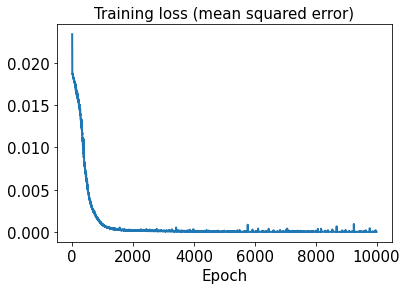

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

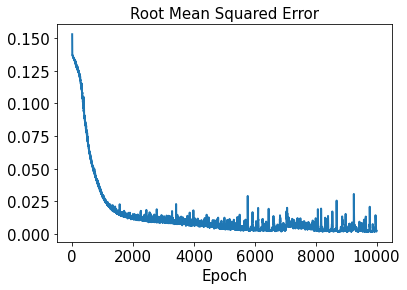

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.00018359274


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.0056521515


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

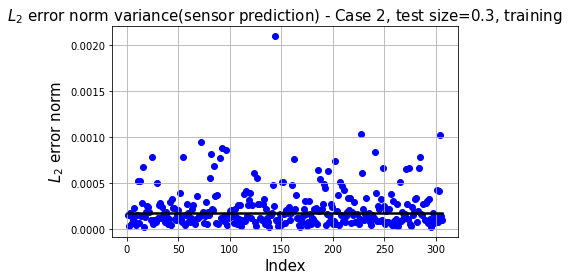

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

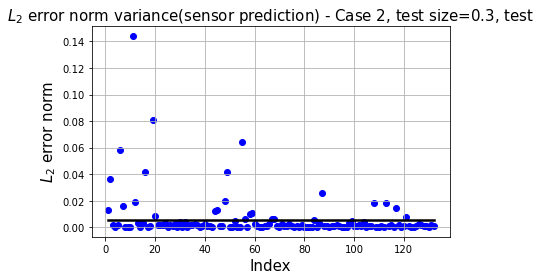

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
8/8 [==============================] - 0s 22ms/step - loss: 0.0110 - rmse: 0.1043
Epoch 2/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1038
Epoch 3/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.1033
Epoch 4/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1026
Epoch 5/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.1013
Epoch 6/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0099 - rmse: 0.0990
Epoch 7/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0944
Epoch 8/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0884
Epoch 9/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0856
Epoch 10/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 11/10000
8/8 [============================

8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0433
Epoch 87/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 88/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0426
Epoch 89/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0423
Epoch 90/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0419
Epoch 91/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0415
Epoch 92/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0412
Epoch 93/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0408
Epoch 94/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0403
Epoch 95/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0400
Epoch 96/10000
8/8 [==============================] - 0

8/8 [==============================] - 0s 5ms/step - loss: 6.5350e-04 - rmse: 0.0221
Epoch 170/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4688e-04 - rmse: 0.0219
Epoch 171/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4175e-04 - rmse: 0.0218
Epoch 172/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3528e-04 - rmse: 0.0217
Epoch 173/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2844e-04 - rmse: 0.0215
Epoch 174/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2255e-04 - rmse: 0.0214
Epoch 175/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1597e-04 - rmse: 0.0212
Epoch 176/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1180e-04 - rmse: 0.0211
Epoch 177/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0498e-04 - rmse: 0.0210
Epoch 178/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.9840e-04 - rmse: 0.0208
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 3.5046e-04 - rmse: 0.0137
Epoch 251/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4952e-04 - rmse: 0.0136
Epoch 252/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4747e-04 - rmse: 0.0136
Epoch 253/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4546e-04 - rmse: 0.0135
Epoch 254/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4341e-04 - rmse: 0.0134
Epoch 255/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4128e-04 - rmse: 0.0133
Epoch 256/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3989e-04 - rmse: 0.0133
Epoch 257/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3801e-04 - rmse: 0.0132
Epoch 258/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3575e-04 - rmse: 0.0131
Epoch 259/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3445e-04 - rmse: 0.0131
Epoch 

8/8 [==============================] - 0s 6ms/step - loss: 2.5710e-04 - rmse: 0.0099
Epoch 332/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5586e-04 - rmse: 0.0098
Epoch 333/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5533e-04 - rmse: 0.0098
Epoch 334/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5574e-04 - rmse: 0.0098
Epoch 335/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5441e-04 - rmse: 0.0098
Epoch 336/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5376e-04 - rmse: 0.0097
Epoch 337/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5307e-04 - rmse: 0.0097
Epoch 338/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5363e-04 - rmse: 0.0097
Epoch 339/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5205e-04 - rmse: 0.0097
Epoch 340/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5078e-04 - rmse: 0.0096
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 2.1378e-04 - rmse: 0.0078
Epoch 413/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1345e-04 - rmse: 0.0078
Epoch 414/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1313e-04 - rmse: 0.0078
Epoch 415/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1263e-04 - rmse: 0.0077
Epoch 416/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1240e-04 - rmse: 0.0077
Epoch 417/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1201e-04 - rmse: 0.0077
Epoch 418/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1157e-04 - rmse: 0.0077
Epoch 419/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1109e-04 - rmse: 0.0077
Epoch 420/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1059e-04 - rmse: 0.0076
Epoch 421/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1008e-04 - rmse: 0.0076
Epoch 

8/8 [==============================] - 0s 6ms/step - loss: 1.8791e-04 - rmse: 0.0065
Epoch 494/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.8747e-04 - rmse: 0.0064
Epoch 495/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8725e-04 - rmse: 0.0064
Epoch 496/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8699e-04 - rmse: 0.0064
Epoch 497/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8685e-04 - rmse: 0.0064
Epoch 498/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8645e-04 - rmse: 0.0064
Epoch 499/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8607e-04 - rmse: 0.0064
Epoch 500/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.8592e-04 - rmse: 0.0063
Epoch 501/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8589e-04 - rmse: 0.0064
Epoch 502/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8555e-04 - rmse: 0.0063
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.6949e-04 - rmse: 0.0055
Epoch 575/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.6946e-04 - rmse: 0.0055
Epoch 576/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6929e-04 - rmse: 0.0055
Epoch 577/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6874e-04 - rmse: 0.0055
Epoch 578/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6840e-04 - rmse: 0.0055
Epoch 579/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.6840e-04 - rmse: 0.0055
Epoch 580/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6783e-04 - rmse: 0.0054
Epoch 581/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6800e-04 - rmse: 0.0054
Epoch 582/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6785e-04 - rmse: 0.0054
Epoch 583/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6780e-04 - rmse: 0.0054
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.5530e-04 - rmse: 0.0049
Epoch 656/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5494e-04 - rmse: 0.0049
Epoch 657/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5459e-04 - rmse: 0.0048
Epoch 658/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5455e-04 - rmse: 0.0048
Epoch 659/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5440e-04 - rmse: 0.0048
Epoch 660/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5412e-04 - rmse: 0.0048
Epoch 661/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5385e-04 - rmse: 0.0048
Epoch 662/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5367e-04 - rmse: 0.0048
Epoch 663/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5372e-04 - rmse: 0.0048
Epoch 664/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5370e-04 - rmse: 0.0048
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.4338e-04 - rmse: 0.0044
Epoch 737/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4305e-04 - rmse: 0.0044
Epoch 738/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4274e-04 - rmse: 0.0043
Epoch 739/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4283e-04 - rmse: 0.0044
Epoch 740/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4276e-04 - rmse: 0.0044
Epoch 741/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4246e-04 - rmse: 0.0043
Epoch 742/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4232e-04 - rmse: 0.0043
Epoch 743/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4218e-04 - rmse: 0.0043
Epoch 744/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4196e-04 - rmse: 0.0043
Epoch 745/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4188e-04 - rmse: 0.0043
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.3273e-04 - rmse: 0.0040
Epoch 818/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.3254e-04 - rmse: 0.0040
Epoch 819/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3234e-04 - rmse: 0.0040
Epoch 820/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3215e-04 - rmse: 0.0040
Epoch 821/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3219e-04 - rmse: 0.0040
Epoch 822/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3222e-04 - rmse: 0.0040
Epoch 823/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3222e-04 - rmse: 0.0040
Epoch 824/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3207e-04 - rmse: 0.0040
Epoch 825/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3178e-04 - rmse: 0.0040
Epoch 826/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.3149e-04 - rmse: 0.0039
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.2365e-04 - rmse: 0.0037
Epoch 899/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2347e-04 - rmse: 0.0037
Epoch 900/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2318e-04 - rmse: 0.0037
Epoch 901/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2316e-04 - rmse: 0.0037
Epoch 902/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2321e-04 - rmse: 0.0037
Epoch 903/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2308e-04 - rmse: 0.0037
Epoch 904/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2303e-04 - rmse: 0.0037
Epoch 905/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2286e-04 - rmse: 0.0037
Epoch 906/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2278e-04 - rmse: 0.0037
Epoch 907/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2269e-04 - rmse: 0.0037
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.1557e-04 - rmse: 0.0035
Epoch 980/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1539e-04 - rmse: 0.0035
Epoch 981/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1527e-04 - rmse: 0.0035
Epoch 982/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1521e-04 - rmse: 0.0035
Epoch 983/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1499e-04 - rmse: 0.0034
Epoch 984/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1488e-04 - rmse: 0.0034
Epoch 985/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1490e-04 - rmse: 0.0035
Epoch 986/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1499e-04 - rmse: 0.0035
Epoch 987/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1475e-04 - rmse: 0.0035
Epoch 988/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1459e-04 - rmse: 0.0034
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.0850e-04 - rmse: 0.0033
Epoch 1060/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0847e-04 - rmse: 0.0033
Epoch 1061/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0834e-04 - rmse: 0.0033
Epoch 1062/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0820e-04 - rmse: 0.0033
Epoch 1063/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0809e-04 - rmse: 0.0033
Epoch 1064/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0790e-04 - rmse: 0.0033
Epoch 1065/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0785e-04 - rmse: 0.0033
Epoch 1066/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0769e-04 - rmse: 0.0033
Epoch 1067/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0763e-04 - rmse: 0.0033
Epoch 1068/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0759e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.0199e-04 - rmse: 0.0031
Epoch 1140/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0192e-04 - rmse: 0.0031
Epoch 1141/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0178e-04 - rmse: 0.0031
Epoch 1142/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0165e-04 - rmse: 0.0031
Epoch 1143/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0157e-04 - rmse: 0.0031
Epoch 1144/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0151e-04 - rmse: 0.0031
Epoch 1145/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0147e-04 - rmse: 0.0031
Epoch 1146/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0139e-04 - rmse: 0.0031
Epoch 1147/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0138e-04 - rmse: 0.0031
Epoch 1148/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0135e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 9.6182e-05 - rmse: 0.0030
Epoch 1220/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6119e-05 - rmse: 0.0030
Epoch 1221/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.6064e-05 - rmse: 0.0030
Epoch 1222/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6037e-05 - rmse: 0.0030
Epoch 1223/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.6031e-05 - rmse: 0.0030
Epoch 1224/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5840e-05 - rmse: 0.0030
Epoch 1225/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.5778e-05 - rmse: 0.0030
Epoch 1226/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5678e-05 - rmse: 0.0030
Epoch 1227/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5679e-05 - rmse: 0.0030
Epoch 1228/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5608e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 9.1136e-05 - rmse: 0.0029
Epoch 1300/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1117e-05 - rmse: 0.0029
Epoch 1301/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1022e-05 - rmse: 0.0029
Epoch 1302/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0868e-05 - rmse: 0.0029
Epoch 1303/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0864e-05 - rmse: 0.0029
Epoch 1304/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.0831e-05 - rmse: 0.0029
Epoch 1305/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0753e-05 - rmse: 0.0029
Epoch 1306/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0986e-05 - rmse: 0.0029
Epoch 1307/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0774e-05 - rmse: 0.0029
Epoch 1308/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0699e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 8.6377e-05 - rmse: 0.0028
Epoch 1380/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6240e-05 - rmse: 0.0028
Epoch 1381/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6245e-05 - rmse: 0.0028
Epoch 1382/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6269e-05 - rmse: 0.0028
Epoch 1383/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6197e-05 - rmse: 0.0028
Epoch 1384/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6065e-05 - rmse: 0.0028
Epoch 1385/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6237e-05 - rmse: 0.0028
Epoch 1386/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6102e-05 - rmse: 0.0028
Epoch 1387/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6015e-05 - rmse: 0.0028
Epoch 1388/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.5992e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 8.2055e-05 - rmse: 0.0027
Epoch 1460/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.1945e-05 - rmse: 0.0027
Epoch 1461/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1918e-05 - rmse: 0.0027
Epoch 1462/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1894e-05 - rmse: 0.0027
Epoch 1463/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1788e-05 - rmse: 0.0027
Epoch 1464/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1807e-05 - rmse: 0.0027
Epoch 1465/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1740e-05 - rmse: 0.0027
Epoch 1466/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.1668e-05 - rmse: 0.0027
Epoch 1467/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1684e-05 - rmse: 0.0027
Epoch 1468/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.1625e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.8294e-05 - rmse: 0.0026
Epoch 1540/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.8199e-05 - rmse: 0.0026
Epoch 1541/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8485e-05 - rmse: 0.0027
Epoch 1542/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8829e-05 - rmse: 0.0028
Epoch 1543/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8752e-05 - rmse: 0.0028
Epoch 1544/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8340e-05 - rmse: 0.0027
Epoch 1545/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8125e-05 - rmse: 0.0027
Epoch 1546/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7814e-05 - rmse: 0.0026
Epoch 1547/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7718e-05 - rmse: 0.0026
Epoch 1548/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.7673e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 7.4940e-05 - rmse: 0.0026
Epoch 1620/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4845e-05 - rmse: 0.0026
Epoch 1621/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.5073e-05 - rmse: 0.0027
Epoch 1622/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.4698e-05 - rmse: 0.0026
Epoch 1623/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4825e-05 - rmse: 0.0026
Epoch 1624/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4541e-05 - rmse: 0.0026
Epoch 1625/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4401e-05 - rmse: 0.0026
Epoch 1626/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4352e-05 - rmse: 0.0026
Epoch 1627/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4486e-05 - rmse: 0.0026
Epoch 1628/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4865e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 7.1408e-05 - rmse: 0.0025
Epoch 1700/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1386e-05 - rmse: 0.0025
Epoch 1701/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1258e-05 - rmse: 0.0025
Epoch 1702/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1149e-05 - rmse: 0.0025
Epoch 1703/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1122e-05 - rmse: 0.0025
Epoch 1704/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1152e-05 - rmse: 0.0025
Epoch 1705/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1203e-05 - rmse: 0.0025
Epoch 1706/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1101e-05 - rmse: 0.0025
Epoch 1707/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.1007e-05 - rmse: 0.0025
Epoch 1708/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.1010e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 6.8353e-05 - rmse: 0.0024
Epoch 1780/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8429e-05 - rmse: 0.0024
Epoch 1781/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8478e-05 - rmse: 0.0025
Epoch 1782/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8336e-05 - rmse: 0.0024
Epoch 1783/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8446e-05 - rmse: 0.0025
Epoch 1784/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.8403e-05 - rmse: 0.0025
Epoch 1785/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8246e-05 - rmse: 0.0024
Epoch 1786/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8181e-05 - rmse: 0.0024
Epoch 1787/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8133e-05 - rmse: 0.0024
Epoch 1788/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8102e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.5646e-05 - rmse: 0.0024
Epoch 1860/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5631e-05 - rmse: 0.0024
Epoch 1861/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5651e-05 - rmse: 0.0024
Epoch 1862/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5585e-05 - rmse: 0.0024
Epoch 1863/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5551e-05 - rmse: 0.0024
Epoch 1864/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5616e-05 - rmse: 0.0024
Epoch 1865/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5475e-05 - rmse: 0.0024
Epoch 1866/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5426e-05 - rmse: 0.0024
Epoch 1867/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.5348e-05 - rmse: 0.0023
Epoch 1868/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5375e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 6.3230e-05 - rmse: 0.0023
Epoch 1940/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3273e-05 - rmse: 0.0023
Epoch 1941/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3567e-05 - rmse: 0.0024
Epoch 1942/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3448e-05 - rmse: 0.0024
Epoch 1943/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3390e-05 - rmse: 0.0024
Epoch 1944/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3371e-05 - rmse: 0.0024
Epoch 1945/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3132e-05 - rmse: 0.0023
Epoch 1946/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.2952e-05 - rmse: 0.0023
Epoch 1947/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2998e-05 - rmse: 0.0023
Epoch 1948/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3009e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.0937e-05 - rmse: 0.0023
Epoch 2020/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0904e-05 - rmse: 0.0023
Epoch 2021/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0804e-05 - rmse: 0.0023
Epoch 2022/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0830e-05 - rmse: 0.0023
Epoch 2023/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.0823e-05 - rmse: 0.0023
Epoch 2024/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.0783e-05 - rmse: 0.0023
Epoch 2025/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0763e-05 - rmse: 0.0023
Epoch 2026/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.0797e-05 - rmse: 0.0023
Epoch 2027/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.0855e-05 - rmse: 0.0023
Epoch 2028/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.0828e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 5.8738e-05 - rmse: 0.0022
Epoch 2100/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.8769e-05 - rmse: 0.0022
Epoch 2101/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.8875e-05 - rmse: 0.0023
Epoch 2102/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.8825e-05 - rmse: 0.0023
Epoch 2103/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.8952e-05 - rmse: 0.0023
Epoch 2104/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.9072e-05 - rmse: 0.0023
Epoch 2105/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.8938e-05 - rmse: 0.0023
Epoch 2106/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.8868e-05 - rmse: 0.0023
Epoch 2107/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.8810e-05 - rmse: 0.0023
Epoch 2108/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.8814e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 5.6824e-05 - rmse: 0.0022
Epoch 2180/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.6785e-05 - rmse: 0.0022
Epoch 2181/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.6872e-05 - rmse: 0.0022
Epoch 2182/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.6786e-05 - rmse: 0.0022
Epoch 2183/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.6739e-05 - rmse: 0.0022
Epoch 2184/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.6715e-05 - rmse: 0.0022
Epoch 2185/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.6795e-05 - rmse: 0.0022
Epoch 2186/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.6811e-05 - rmse: 0.0022
Epoch 2187/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.6739e-05 - rmse: 0.0022
Epoch 2188/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.6753e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 5.5066e-05 - rmse: 0.0022
Epoch 2260/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.5299e-05 - rmse: 0.0022
Epoch 2261/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.5090e-05 - rmse: 0.0022
Epoch 2262/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.4886e-05 - rmse: 0.0021
Epoch 2263/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.4853e-05 - rmse: 0.0021
Epoch 2264/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.4901e-05 - rmse: 0.0022
Epoch 2265/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.4850e-05 - rmse: 0.0021
Epoch 2266/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.4797e-05 - rmse: 0.0021
Epoch 2267/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.4703e-05 - rmse: 0.0021
Epoch 2268/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.4712e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 5.3406e-05 - rmse: 0.0021
Epoch 2340/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.3339e-05 - rmse: 0.0021
Epoch 2341/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3523e-05 - rmse: 0.0022
Epoch 2342/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3566e-05 - rmse: 0.0022
Epoch 2343/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3385e-05 - rmse: 0.0021
Epoch 2344/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3481e-05 - rmse: 0.0022
Epoch 2345/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3535e-05 - rmse: 0.0022
Epoch 2346/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3494e-05 - rmse: 0.0022
Epoch 2347/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3764e-05 - rmse: 0.0023
Epoch 2348/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3825e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 5.1967e-05 - rmse: 0.0021
Epoch 2420/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.2024e-05 - rmse: 0.0021
Epoch 2421/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.2471e-05 - rmse: 0.0022
Epoch 2422/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.2404e-05 - rmse: 0.0022
Epoch 2423/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.2688e-05 - rmse: 0.0023
Epoch 2424/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.2392e-05 - rmse: 0.0022
Epoch 2425/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.2053e-05 - rmse: 0.0022
Epoch 2426/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.1790e-05 - rmse: 0.0021
Epoch 2427/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.1687e-05 - rmse: 0.0021
Epoch 2428/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.1631e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 5.0522e-05 - rmse: 0.0021
Epoch 2500/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0557e-05 - rmse: 0.0021
Epoch 2501/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0400e-05 - rmse: 0.0021
Epoch 2502/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0366e-05 - rmse: 0.0021
Epoch 2503/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0334e-05 - rmse: 0.0021
Epoch 2504/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0395e-05 - rmse: 0.0021
Epoch 2505/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0348e-05 - rmse: 0.0021
Epoch 2506/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0427e-05 - rmse: 0.0021
Epoch 2507/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0414e-05 - rmse: 0.0021
Epoch 2508/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0212e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 4.8889e-05 - rmse: 0.0020
Epoch 2580/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8884e-05 - rmse: 0.0020
Epoch 2581/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8941e-05 - rmse: 0.0020
Epoch 2582/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8966e-05 - rmse: 0.0020
Epoch 2583/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8882e-05 - rmse: 0.0020
Epoch 2584/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8879e-05 - rmse: 0.0020
Epoch 2585/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8986e-05 - rmse: 0.0021
Epoch 2586/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8975e-05 - rmse: 0.0021
Epoch 2587/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8946e-05 - rmse: 0.0021
Epoch 2588/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8802e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.7766e-05 - rmse: 0.0020
Epoch 2660/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7795e-05 - rmse: 0.0020
Epoch 2661/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7708e-05 - rmse: 0.0020
Epoch 2662/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7809e-05 - rmse: 0.0020
Epoch 2663/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7870e-05 - rmse: 0.0021
Epoch 2664/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.7701e-05 - rmse: 0.0020
Epoch 2665/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.7625e-05 - rmse: 0.0020
Epoch 2666/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7703e-05 - rmse: 0.0020
Epoch 2667/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.7655e-05 - rmse: 0.0020
Epoch 2668/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7618e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.6656e-05 - rmse: 0.0020
Epoch 2740/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6585e-05 - rmse: 0.0020
Epoch 2741/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6483e-05 - rmse: 0.0020
Epoch 2742/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.6432e-05 - rmse: 0.0020
Epoch 2743/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6476e-05 - rmse: 0.0020
Epoch 2744/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6381e-05 - rmse: 0.0020
Epoch 2745/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6427e-05 - rmse: 0.0020
Epoch 2746/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6426e-05 - rmse: 0.0020
Epoch 2747/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6489e-05 - rmse: 0.0020
Epoch 2748/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6342e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 4.5381e-05 - rmse: 0.0019
Epoch 2820/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.5356e-05 - rmse: 0.0019
Epoch 2821/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.5290e-05 - rmse: 0.0019
Epoch 2822/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.5257e-05 - rmse: 0.0019
Epoch 2823/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.5277e-05 - rmse: 0.0019
Epoch 2824/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.5433e-05 - rmse: 0.0020
Epoch 2825/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.5477e-05 - rmse: 0.0020
Epoch 2826/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.5452e-05 - rmse: 0.0020
Epoch 2827/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.5273e-05 - rmse: 0.0019
Epoch 2828/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.5317e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.4251e-05 - rmse: 0.0019
Epoch 2900/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4219e-05 - rmse: 0.0019
Epoch 2901/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.4267e-05 - rmse: 0.0019
Epoch 2902/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4391e-05 - rmse: 0.0019
Epoch 2903/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4391e-05 - rmse: 0.0020
Epoch 2904/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4371e-05 - rmse: 0.0019
Epoch 2905/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4319e-05 - rmse: 0.0019
Epoch 2906/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4262e-05 - rmse: 0.0019
Epoch 2907/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.4197e-05 - rmse: 0.0019
Epoch 2908/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4209e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.3587e-05 - rmse: 0.0020
Epoch 2980/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.3484e-05 - rmse: 0.0019
Epoch 2981/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.3567e-05 - rmse: 0.0020
Epoch 2982/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3575e-05 - rmse: 0.0020
Epoch 2983/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.3579e-05 - rmse: 0.0020
Epoch 2984/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3292e-05 - rmse: 0.0019
Epoch 2985/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3326e-05 - rmse: 0.0019
Epoch 2986/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3481e-05 - rmse: 0.0019
Epoch 2987/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.3511e-05 - rmse: 0.0020
Epoch 2988/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3369e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.2509e-05 - rmse: 0.0019
Epoch 3060/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.2574e-05 - rmse: 0.0019
Epoch 3061/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.2473e-05 - rmse: 0.0019
Epoch 3062/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.2459e-05 - rmse: 0.0019
Epoch 3063/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2463e-05 - rmse: 0.0019
Epoch 3064/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.2471e-05 - rmse: 0.0019
Epoch 3065/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2413e-05 - rmse: 0.0019
Epoch 3066/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2416e-05 - rmse: 0.0019
Epoch 3067/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2373e-05 - rmse: 0.0019
Epoch 3068/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2584e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.1560e-05 - rmse: 0.0019
Epoch 3140/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1584e-05 - rmse: 0.0019
Epoch 3141/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1490e-05 - rmse: 0.0018
Epoch 3142/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1509e-05 - rmse: 0.0018
Epoch 3143/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1434e-05 - rmse: 0.0018
Epoch 3144/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1577e-05 - rmse: 0.0019
Epoch 3145/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1568e-05 - rmse: 0.0019
Epoch 3146/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1574e-05 - rmse: 0.0019
Epoch 3147/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1467e-05 - rmse: 0.0018
Epoch 3148/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1468e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.0810e-05 - rmse: 0.0019
Epoch 3220/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0833e-05 - rmse: 0.0019
Epoch 3221/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0869e-05 - rmse: 0.0019
Epoch 3222/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0944e-05 - rmse: 0.0019
Epoch 3223/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1085e-05 - rmse: 0.0019
Epoch 3224/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1115e-05 - rmse: 0.0019
Epoch 3225/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0893e-05 - rmse: 0.0019
Epoch 3226/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0764e-05 - rmse: 0.0019
Epoch 3227/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.0742e-05 - rmse: 0.0019
Epoch 3228/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0826e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.0027e-05 - rmse: 0.0018
Epoch 3300/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.0020e-05 - rmse: 0.0018
Epoch 3301/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0032e-05 - rmse: 0.0018
Epoch 3302/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0069e-05 - rmse: 0.0018
Epoch 3303/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0014e-05 - rmse: 0.0018
Epoch 3304/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0053e-05 - rmse: 0.0018
Epoch 3305/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0040e-05 - rmse: 0.0018
Epoch 3306/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.9968e-05 - rmse: 0.0018
Epoch 3307/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0082e-05 - rmse: 0.0019
Epoch 3308/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0404e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.9254e-05 - rmse: 0.0018
Epoch 3380/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9220e-05 - rmse: 0.0018
Epoch 3381/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9177e-05 - rmse: 0.0018
Epoch 3382/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9188e-05 - rmse: 0.0018
Epoch 3383/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9253e-05 - rmse: 0.0018
Epoch 3384/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9296e-05 - rmse: 0.0018
Epoch 3385/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.9226e-05 - rmse: 0.0018
Epoch 3386/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9184e-05 - rmse: 0.0018
Epoch 3387/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9154e-05 - rmse: 0.0018
Epoch 3388/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9209e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.8719e-05 - rmse: 0.0018
Epoch 3460/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.8722e-05 - rmse: 0.0018
Epoch 3461/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8832e-05 - rmse: 0.0018
Epoch 3462/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8774e-05 - rmse: 0.0018
Epoch 3463/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8635e-05 - rmse: 0.0018
Epoch 3464/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8550e-05 - rmse: 0.0018
Epoch 3465/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.8533e-05 - rmse: 0.0018
Epoch 3466/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8526e-05 - rmse: 0.0018
Epoch 3467/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8553e-05 - rmse: 0.0018
Epoch 3468/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8520e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 3.8086e-05 - rmse: 0.0018
Epoch 3540/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8025e-05 - rmse: 0.0018
Epoch 3541/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.7962e-05 - rmse: 0.0018
Epoch 3542/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7949e-05 - rmse: 0.0018
Epoch 3543/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7905e-05 - rmse: 0.0018
Epoch 3544/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7928e-05 - rmse: 0.0018
Epoch 3545/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7943e-05 - rmse: 0.0018
Epoch 3546/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7914e-05 - rmse: 0.0018
Epoch 3547/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7934e-05 - rmse: 0.0018
Epoch 3548/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7978e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.7558e-05 - rmse: 0.0018
Epoch 3620/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7593e-05 - rmse: 0.0018
Epoch 3621/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7537e-05 - rmse: 0.0018
Epoch 3622/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7510e-05 - rmse: 0.0018
Epoch 3623/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7428e-05 - rmse: 0.0018
Epoch 3624/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7377e-05 - rmse: 0.0018
Epoch 3625/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7396e-05 - rmse: 0.0018
Epoch 3626/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7463e-05 - rmse: 0.0018
Epoch 3627/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.7408e-05 - rmse: 0.0018
Epoch 3628/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7486e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.7095e-05 - rmse: 0.0018
Epoch 3700/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6978e-05 - rmse: 0.0018
Epoch 3701/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.6837e-05 - rmse: 0.0018
Epoch 3702/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6842e-05 - rmse: 0.0018
Epoch 3703/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6780e-05 - rmse: 0.0017
Epoch 3704/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6805e-05 - rmse: 0.0018
Epoch 3705/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6820e-05 - rmse: 0.0018
Epoch 3706/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6765e-05 - rmse: 0.0017
Epoch 3707/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.6795e-05 - rmse: 0.0018
Epoch 3708/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6748e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.6509e-05 - rmse: 0.0018
Epoch 3780/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6300e-05 - rmse: 0.0017
Epoch 3781/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6181e-05 - rmse: 0.0017
Epoch 3782/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6163e-05 - rmse: 0.0017
Epoch 3783/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6212e-05 - rmse: 0.0017
Epoch 3784/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.6265e-05 - rmse: 0.0017
Epoch 3785/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6280e-05 - rmse: 0.0017
Epoch 3786/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6223e-05 - rmse: 0.0017
Epoch 3787/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.6225e-05 - rmse: 0.0017
Epoch 3788/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6292e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.6000e-05 - rmse: 0.0018
Epoch 3860/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.6021e-05 - rmse: 0.0018
Epoch 3861/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5773e-05 - rmse: 0.0017
Epoch 3862/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5706e-05 - rmse: 0.0017
Epoch 3863/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5870e-05 - rmse: 0.0018
Epoch 3864/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5822e-05 - rmse: 0.0017
Epoch 3865/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5773e-05 - rmse: 0.0017
Epoch 3866/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5770e-05 - rmse: 0.0017
Epoch 3867/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.5746e-05 - rmse: 0.0017
Epoch 3868/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5774e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.5232e-05 - rmse: 0.0017
Epoch 3940/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5223e-05 - rmse: 0.0017
Epoch 3941/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5199e-05 - rmse: 0.0017
Epoch 3942/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5187e-05 - rmse: 0.0017
Epoch 3943/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5203e-05 - rmse: 0.0017
Epoch 3944/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5209e-05 - rmse: 0.0017
Epoch 3945/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5119e-05 - rmse: 0.0017
Epoch 3946/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5092e-05 - rmse: 0.0017
Epoch 3947/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5113e-05 - rmse: 0.0017
Epoch 3948/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5114e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.5679e-05 - rmse: 0.0019
Epoch 4020/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5798e-05 - rmse: 0.0020
Epoch 4021/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5897e-05 - rmse: 0.0020
Epoch 4022/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5431e-05 - rmse: 0.0019
Epoch 4023/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5520e-05 - rmse: 0.0019
Epoch 4024/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5359e-05 - rmse: 0.0019
Epoch 4025/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5226e-05 - rmse: 0.0018
Epoch 4026/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.5113e-05 - rmse: 0.0018
Epoch 4027/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4980e-05 - rmse: 0.0018
Epoch 4028/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4919e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.4495e-05 - rmse: 0.0017
Epoch 4100/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.4466e-05 - rmse: 0.0017
Epoch 4101/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.4432e-05 - rmse: 0.0017
Epoch 4102/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.4545e-05 - rmse: 0.0017
Epoch 4103/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.4829e-05 - rmse: 0.0018
Epoch 4104/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4909e-05 - rmse: 0.0018
Epoch 4105/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.4839e-05 - rmse: 0.0018
Epoch 4106/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.4734e-05 - rmse: 0.0018
Epoch 4107/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4600e-05 - rmse: 0.0018
Epoch 4108/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4619e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.4037e-05 - rmse: 0.0017
Epoch 4180/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.4045e-05 - rmse: 0.0017
Epoch 4181/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4139e-05 - rmse: 0.0017
Epoch 4182/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4113e-05 - rmse: 0.0017
Epoch 4183/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.4110e-05 - rmse: 0.0017
Epoch 4184/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4168e-05 - rmse: 0.0017
Epoch 4185/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4217e-05 - rmse: 0.0018
Epoch 4186/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4154e-05 - rmse: 0.0017
Epoch 4187/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4213e-05 - rmse: 0.0018
Epoch 4188/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4050e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 3.3540e-05 - rmse: 0.0017
Epoch 4260/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3659e-05 - rmse: 0.0017
Epoch 4261/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3712e-05 - rmse: 0.0017
Epoch 4262/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.3745e-05 - rmse: 0.0017
Epoch 4263/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.3608e-05 - rmse: 0.0017
Epoch 4264/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3646e-05 - rmse: 0.0017
Epoch 4265/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3526e-05 - rmse: 0.0017
Epoch 4266/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3450e-05 - rmse: 0.0016
Epoch 4267/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.3422e-05 - rmse: 0.0016
Epoch 4268/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.3452e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 3.3638e-05 - rmse: 0.0018
Epoch 4340/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3463e-05 - rmse: 0.0017
Epoch 4341/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3352e-05 - rmse: 0.0017
Epoch 4342/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3288e-05 - rmse: 0.0017
Epoch 4343/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3190e-05 - rmse: 0.0017
Epoch 4344/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3197e-05 - rmse: 0.0017
Epoch 4345/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3257e-05 - rmse: 0.0017
Epoch 4346/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3236e-05 - rmse: 0.0017
Epoch 4347/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3232e-05 - rmse: 0.0017
Epoch 4348/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3208e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.2711e-05 - rmse: 0.0016
Epoch 4420/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2703e-05 - rmse: 0.0016
Epoch 4421/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2668e-05 - rmse: 0.0016
Epoch 4422/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2681e-05 - rmse: 0.0016
Epoch 4423/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2673e-05 - rmse: 0.0016
Epoch 4424/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2767e-05 - rmse: 0.0016
Epoch 4425/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2785e-05 - rmse: 0.0016
Epoch 4426/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2771e-05 - rmse: 0.0016
Epoch 4427/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2714e-05 - rmse: 0.0016
Epoch 4428/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2632e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 3.2593e-05 - rmse: 0.0017
Epoch 4500/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2566e-05 - rmse: 0.0017
Epoch 4501/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2545e-05 - rmse: 0.0017
Epoch 4502/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2523e-05 - rmse: 0.0017
Epoch 4503/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2506e-05 - rmse: 0.0017
Epoch 4504/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2474e-05 - rmse: 0.0016
Epoch 4505/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2479e-05 - rmse: 0.0016
Epoch 4506/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2535e-05 - rmse: 0.0017
Epoch 4507/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2555e-05 - rmse: 0.0017
Epoch 4508/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2581e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.2059e-05 - rmse: 0.0016
Epoch 4580/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2100e-05 - rmse: 0.0016
Epoch 4581/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2077e-05 - rmse: 0.0016
Epoch 4582/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2055e-05 - rmse: 0.0016
Epoch 4583/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2017e-05 - rmse: 0.0016
Epoch 4584/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2016e-05 - rmse: 0.0016
Epoch 4585/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2172e-05 - rmse: 0.0016
Epoch 4586/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2155e-05 - rmse: 0.0016
Epoch 4587/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2145e-05 - rmse: 0.0016
Epoch 4588/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2307e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.1680e-05 - rmse: 0.0016
Epoch 4660/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.1732e-05 - rmse: 0.0016
Epoch 4661/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.1776e-05 - rmse: 0.0016
Epoch 4662/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1789e-05 - rmse: 0.0016
Epoch 4663/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1811e-05 - rmse: 0.0016
Epoch 4664/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1994e-05 - rmse: 0.0017
Epoch 4665/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1840e-05 - rmse: 0.0016
Epoch 4666/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1959e-05 - rmse: 0.0017
Epoch 4667/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2058e-05 - rmse: 0.0017
Epoch 4668/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1918e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.1457e-05 - rmse: 0.0016
Epoch 4740/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1462e-05 - rmse: 0.0016
Epoch 4741/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1477e-05 - rmse: 0.0016
Epoch 4742/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1498e-05 - rmse: 0.0016
Epoch 4743/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1469e-05 - rmse: 0.0016
Epoch 4744/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1485e-05 - rmse: 0.0016
Epoch 4745/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1629e-05 - rmse: 0.0017
Epoch 4746/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1599e-05 - rmse: 0.0017
Epoch 4747/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1694e-05 - rmse: 0.0017
Epoch 4748/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1756e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.1072e-05 - rmse: 0.0016
Epoch 4820/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.1098e-05 - rmse: 0.0016
Epoch 4821/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1095e-05 - rmse: 0.0016
Epoch 4822/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1070e-05 - rmse: 0.0016
Epoch 4823/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1055e-05 - rmse: 0.0016
Epoch 4824/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1148e-05 - rmse: 0.0016
Epoch 4825/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1220e-05 - rmse: 0.0016
Epoch 4826/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1144e-05 - rmse: 0.0016
Epoch 4827/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.1210e-05 - rmse: 0.0016
Epoch 4828/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1177e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.1025e-05 - rmse: 0.0016
Epoch 4900/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.0919e-05 - rmse: 0.0016
Epoch 4901/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0869e-05 - rmse: 0.0016
Epoch 4902/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0892e-05 - rmse: 0.0016
Epoch 4903/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0903e-05 - rmse: 0.0016
Epoch 4904/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0849e-05 - rmse: 0.0016
Epoch 4905/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0905e-05 - rmse: 0.0016
Epoch 4906/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0915e-05 - rmse: 0.0016
Epoch 4907/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0985e-05 - rmse: 0.0016
Epoch 4908/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0968e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.0780e-05 - rmse: 0.0016
Epoch 4980/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0608e-05 - rmse: 0.0016
Epoch 4981/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0590e-05 - rmse: 0.0016
Epoch 4982/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0540e-05 - rmse: 0.0016
Epoch 4983/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0548e-05 - rmse: 0.0016
Epoch 4984/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0570e-05 - rmse: 0.0016
Epoch 4985/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0523e-05 - rmse: 0.0016
Epoch 4986/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0571e-05 - rmse: 0.0016
Epoch 4987/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.0524e-05 - rmse: 0.0016
Epoch 4988/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0624e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.0275e-05 - rmse: 0.0015
Epoch 5060/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.0208e-05 - rmse: 0.0015
Epoch 5061/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0201e-05 - rmse: 0.0015
Epoch 5062/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0209e-05 - rmse: 0.0015
Epoch 5063/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0235e-05 - rmse: 0.0015
Epoch 5064/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0271e-05 - rmse: 0.0016
Epoch 5065/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0268e-05 - rmse: 0.0016
Epoch 5066/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0318e-05 - rmse: 0.0016
Epoch 5067/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0258e-05 - rmse: 0.0016
Epoch 5068/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0275e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.0103e-05 - rmse: 0.0016
Epoch 5140/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0165e-05 - rmse: 0.0016
Epoch 5141/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0516e-05 - rmse: 0.0017
Epoch 5142/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0367e-05 - rmse: 0.0017
Epoch 5143/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0285e-05 - rmse: 0.0016
Epoch 5144/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0223e-05 - rmse: 0.0016
Epoch 5145/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0244e-05 - rmse: 0.0016
Epoch 5146/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0096e-05 - rmse: 0.0016
Epoch 5147/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.0050e-05 - rmse: 0.0016
Epoch 5148/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0102e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.9722e-05 - rmse: 0.0015
Epoch 5220/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9701e-05 - rmse: 0.0015
Epoch 5221/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9800e-05 - rmse: 0.0015
Epoch 5222/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9786e-05 - rmse: 0.0015
Epoch 5223/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9784e-05 - rmse: 0.0015
Epoch 5224/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9965e-05 - rmse: 0.0016
Epoch 5225/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0047e-05 - rmse: 0.0016
Epoch 5226/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0176e-05 - rmse: 0.0017
Epoch 5227/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0444e-05 - rmse: 0.0017
Epoch 5228/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0582e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.9492e-05 - rmse: 0.0015
Epoch 5300/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9451e-05 - rmse: 0.0015
Epoch 5301/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9467e-05 - rmse: 0.0015
Epoch 5302/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9441e-05 - rmse: 0.0015
Epoch 5303/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9472e-05 - rmse: 0.0015
Epoch 5304/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9464e-05 - rmse: 0.0015
Epoch 5305/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9490e-05 - rmse: 0.0015
Epoch 5306/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9561e-05 - rmse: 0.0015
Epoch 5307/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9515e-05 - rmse: 0.0015
Epoch 5308/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9552e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.9295e-05 - rmse: 0.0015
Epoch 5380/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9320e-05 - rmse: 0.0015
Epoch 5381/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9322e-05 - rmse: 0.0015
Epoch 5382/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9737e-05 - rmse: 0.0017
Epoch 5383/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9806e-05 - rmse: 0.0017
Epoch 5384/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9796e-05 - rmse: 0.0017
Epoch 5385/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9555e-05 - rmse: 0.0016
Epoch 5386/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9675e-05 - rmse: 0.0016
Epoch 5387/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9629e-05 - rmse: 0.0016
Epoch 5388/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9597e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.9165e-05 - rmse: 0.0015
Epoch 5460/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9154e-05 - rmse: 0.0015
Epoch 5461/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9166e-05 - rmse: 0.0015
Epoch 5462/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9119e-05 - rmse: 0.0015
Epoch 5463/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9142e-05 - rmse: 0.0015
Epoch 5464/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9087e-05 - rmse: 0.0015
Epoch 5465/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9067e-05 - rmse: 0.0015
Epoch 5466/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9112e-05 - rmse: 0.0015
Epoch 5467/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9599e-05 - rmse: 0.0017
Epoch 5468/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9528e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.9315e-05 - rmse: 0.0016
Epoch 5540/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9315e-05 - rmse: 0.0016
Epoch 5541/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9136e-05 - rmse: 0.0016
Epoch 5542/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9118e-05 - rmse: 0.0016
Epoch 5543/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9100e-05 - rmse: 0.0016
Epoch 5544/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9078e-05 - rmse: 0.0016
Epoch 5545/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9088e-05 - rmse: 0.0016
Epoch 5546/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8985e-05 - rmse: 0.0015
Epoch 5547/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8850e-05 - rmse: 0.0015
Epoch 5548/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8852e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.9035e-05 - rmse: 0.0016
Epoch 5620/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9065e-05 - rmse: 0.0016
Epoch 5621/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9030e-05 - rmse: 0.0016
Epoch 5622/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8899e-05 - rmse: 0.0016
Epoch 5623/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8835e-05 - rmse: 0.0016
Epoch 5624/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8703e-05 - rmse: 0.0015
Epoch 5625/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8689e-05 - rmse: 0.0015
Epoch 5626/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8681e-05 - rmse: 0.0015
Epoch 5627/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8726e-05 - rmse: 0.0015
Epoch 5628/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8930e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.8670e-05 - rmse: 0.0016
Epoch 5700/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8641e-05 - rmse: 0.0016
Epoch 5701/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8547e-05 - rmse: 0.0015
Epoch 5702/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8599e-05 - rmse: 0.0015
Epoch 5703/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8555e-05 - rmse: 0.0015
Epoch 5704/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8460e-05 - rmse: 0.0015
Epoch 5705/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8394e-05 - rmse: 0.0015
Epoch 5706/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8446e-05 - rmse: 0.0015
Epoch 5707/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8447e-05 - rmse: 0.0015
Epoch 5708/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8509e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.8820e-05 - rmse: 0.0017
Epoch 5780/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8713e-05 - rmse: 0.0016
Epoch 5781/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8597e-05 - rmse: 0.0016
Epoch 5782/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8536e-05 - rmse: 0.0016
Epoch 5783/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8354e-05 - rmse: 0.0015
Epoch 5784/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8356e-05 - rmse: 0.0015
Epoch 5785/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8278e-05 - rmse: 0.0015
Epoch 5786/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8365e-05 - rmse: 0.0015
Epoch 5787/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8286e-05 - rmse: 0.0015
Epoch 5788/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8361e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.7989e-05 - rmse: 0.0014
Epoch 5860/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7979e-05 - rmse: 0.0014
Epoch 5861/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8004e-05 - rmse: 0.0015
Epoch 5862/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7996e-05 - rmse: 0.0015
Epoch 5863/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8058e-05 - rmse: 0.0015
Epoch 5864/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8013e-05 - rmse: 0.0015
Epoch 5865/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7948e-05 - rmse: 0.0014
Epoch 5866/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7993e-05 - rmse: 0.0015
Epoch 5867/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8064e-05 - rmse: 0.0015
Epoch 5868/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8086e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.7820e-05 - rmse: 0.0014
Epoch 5940/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7803e-05 - rmse: 0.0014
Epoch 5941/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7862e-05 - rmse: 0.0015
Epoch 5942/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7869e-05 - rmse: 0.0015
Epoch 5943/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7891e-05 - rmse: 0.0015
Epoch 5944/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7893e-05 - rmse: 0.0015
Epoch 5945/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7932e-05 - rmse: 0.0015
Epoch 5946/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7874e-05 - rmse: 0.0015
Epoch 5947/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7821e-05 - rmse: 0.0015
Epoch 5948/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7807e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.8227e-05 - rmse: 0.0016
Epoch 6020/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8091e-05 - rmse: 0.0016
Epoch 6021/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8079e-05 - rmse: 0.0016
Epoch 6022/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8238e-05 - rmse: 0.0016
Epoch 6023/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8451e-05 - rmse: 0.0017
Epoch 6024/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9029e-05 - rmse: 0.0019
Epoch 6025/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9029e-05 - rmse: 0.0019
Epoch 6026/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8718e-05 - rmse: 0.0018
Epoch 6027/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8543e-05 - rmse: 0.0017
Epoch 6028/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8248e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.8669e-05 - rmse: 0.0018
Epoch 6100/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8354e-05 - rmse: 0.0017
Epoch 6101/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8279e-05 - rmse: 0.0017
Epoch 6102/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8536e-05 - rmse: 0.0018
Epoch 6103/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8679e-05 - rmse: 0.0018
Epoch 6104/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8361e-05 - rmse: 0.0017
Epoch 6105/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8496e-05 - rmse: 0.0018
Epoch 6106/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8159e-05 - rmse: 0.0017
Epoch 6107/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8496e-05 - rmse: 0.0018
Epoch 6108/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8790e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.7312e-05 - rmse: 0.0014
Epoch 6180/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7285e-05 - rmse: 0.0014
Epoch 6181/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7315e-05 - rmse: 0.0014
Epoch 6182/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7293e-05 - rmse: 0.0014
Epoch 6183/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7264e-05 - rmse: 0.0014
Epoch 6184/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7253e-05 - rmse: 0.0014
Epoch 6185/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7280e-05 - rmse: 0.0014
Epoch 6186/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7310e-05 - rmse: 0.0014
Epoch 6187/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7229e-05 - rmse: 0.0014
Epoch 6188/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7227e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.7408e-05 - rmse: 0.0015
Epoch 6260/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7542e-05 - rmse: 0.0016
Epoch 6261/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7374e-05 - rmse: 0.0015
Epoch 6262/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7451e-05 - rmse: 0.0015
Epoch 6263/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7295e-05 - rmse: 0.0015
Epoch 6264/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7236e-05 - rmse: 0.0015
Epoch 6265/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7223e-05 - rmse: 0.0014
Epoch 6266/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7173e-05 - rmse: 0.0014
Epoch 6267/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7199e-05 - rmse: 0.0014
Epoch 6268/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7119e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.7438e-05 - rmse: 0.0016
Epoch 6340/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7492e-05 - rmse: 0.0016
Epoch 6341/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8296e-05 - rmse: 0.0018
Epoch 6342/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7956e-05 - rmse: 0.0017
Epoch 6343/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7629e-05 - rmse: 0.0016
Epoch 6344/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7419e-05 - rmse: 0.0016
Epoch 6345/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7319e-05 - rmse: 0.0015
Epoch 6346/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7139e-05 - rmse: 0.0015
Epoch 6347/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7101e-05 - rmse: 0.0015
Epoch 6348/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7057e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.7114e-05 - rmse: 0.0015
Epoch 6420/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6990e-05 - rmse: 0.0015
Epoch 6421/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6925e-05 - rmse: 0.0014
Epoch 6422/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6855e-05 - rmse: 0.0014
Epoch 6423/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6851e-05 - rmse: 0.0014
Epoch 6424/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6858e-05 - rmse: 0.0014
Epoch 6425/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6817e-05 - rmse: 0.0014
Epoch 6426/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6835e-05 - rmse: 0.0014
Epoch 6427/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6905e-05 - rmse: 0.0014
Epoch 6428/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6955e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.6892e-05 - rmse: 0.0015
Epoch 6500/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6970e-05 - rmse: 0.0015
Epoch 6501/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6887e-05 - rmse: 0.0015
Epoch 6502/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6872e-05 - rmse: 0.0015
Epoch 6503/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6986e-05 - rmse: 0.0015
Epoch 6504/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6903e-05 - rmse: 0.0015
Epoch 6505/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6800e-05 - rmse: 0.0014
Epoch 6506/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6731e-05 - rmse: 0.0014
Epoch 6507/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6807e-05 - rmse: 0.0015
Epoch 6508/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6866e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.6593e-05 - rmse: 0.0014
Epoch 6580/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6614e-05 - rmse: 0.0014
Epoch 6581/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6570e-05 - rmse: 0.0014
Epoch 6582/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6600e-05 - rmse: 0.0014
Epoch 6583/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6711e-05 - rmse: 0.0015
Epoch 6584/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6744e-05 - rmse: 0.0015
Epoch 6585/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6910e-05 - rmse: 0.0015
Epoch 6586/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6922e-05 - rmse: 0.0015
Epoch 6587/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6858e-05 - rmse: 0.0015
Epoch 6588/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6851e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.6517e-05 - rmse: 0.0014
Epoch 6660/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6441e-05 - rmse: 0.0014
Epoch 6661/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6431e-05 - rmse: 0.0014
Epoch 6662/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6410e-05 - rmse: 0.0014
Epoch 6663/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6403e-05 - rmse: 0.0014
Epoch 6664/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6377e-05 - rmse: 0.0014
Epoch 6665/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6463e-05 - rmse: 0.0014
Epoch 6666/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6486e-05 - rmse: 0.0014
Epoch 6667/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6479e-05 - rmse: 0.0014
Epoch 6668/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6401e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.6425e-05 - rmse: 0.0014
Epoch 6740/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6631e-05 - rmse: 0.0015
Epoch 6741/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6501e-05 - rmse: 0.0015
Epoch 6742/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6376e-05 - rmse: 0.0014
Epoch 6743/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6424e-05 - rmse: 0.0014
Epoch 6744/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6387e-05 - rmse: 0.0014
Epoch 6745/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6486e-05 - rmse: 0.0015
Epoch 6746/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6461e-05 - rmse: 0.0015
Epoch 6747/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6443e-05 - rmse: 0.0015
Epoch 6748/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6368e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.6294e-05 - rmse: 0.0014
Epoch 6820/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6326e-05 - rmse: 0.0015
Epoch 6821/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6479e-05 - rmse: 0.0015
Epoch 6822/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6495e-05 - rmse: 0.0015
Epoch 6823/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6441e-05 - rmse: 0.0015
Epoch 6824/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6508e-05 - rmse: 0.0015
Epoch 6825/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6393e-05 - rmse: 0.0015
Epoch 6826/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6640e-05 - rmse: 0.0016
Epoch 6827/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6624e-05 - rmse: 0.0016
Epoch 6828/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6361e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.6027e-05 - rmse: 0.0014
Epoch 6900/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6054e-05 - rmse: 0.0014
Epoch 6901/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6046e-05 - rmse: 0.0014
Epoch 6902/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6107e-05 - rmse: 0.0014
Epoch 6903/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6248e-05 - rmse: 0.0015
Epoch 6904/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6265e-05 - rmse: 0.0015
Epoch 6905/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6289e-05 - rmse: 0.0015
Epoch 6906/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6126e-05 - rmse: 0.0014
Epoch 6907/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6246e-05 - rmse: 0.0015
Epoch 6908/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6491e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5976e-05 - rmse: 0.0014
Epoch 6980/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5891e-05 - rmse: 0.0014
Epoch 6981/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5928e-05 - rmse: 0.0014
Epoch 6982/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6035e-05 - rmse: 0.0014
Epoch 6983/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5913e-05 - rmse: 0.0014
Epoch 6984/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5908e-05 - rmse: 0.0014
Epoch 6985/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5960e-05 - rmse: 0.0014
Epoch 6986/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6000e-05 - rmse: 0.0014
Epoch 6987/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6040e-05 - rmse: 0.0014
Epoch 6988/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5908e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.6052e-05 - rmse: 0.0015
Epoch 7060/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6000e-05 - rmse: 0.0015
Epoch 7061/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5955e-05 - rmse: 0.0014
Epoch 7062/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6000e-05 - rmse: 0.0015
Epoch 7063/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6155e-05 - rmse: 0.0015
Epoch 7064/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5982e-05 - rmse: 0.0015
Epoch 7065/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5940e-05 - rmse: 0.0014
Epoch 7066/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5854e-05 - rmse: 0.0014
Epoch 7067/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5795e-05 - rmse: 0.0014
Epoch 7068/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5866e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5817e-05 - rmse: 0.0014
Epoch 7140/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5926e-05 - rmse: 0.0015
Epoch 7141/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5923e-05 - rmse: 0.0015
Epoch 7142/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5979e-05 - rmse: 0.0015
Epoch 7143/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6026e-05 - rmse: 0.0015
Epoch 7144/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5972e-05 - rmse: 0.0015
Epoch 7145/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5990e-05 - rmse: 0.0015
Epoch 7146/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6042e-05 - rmse: 0.0015
Epoch 7147/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5847e-05 - rmse: 0.0014
Epoch 7148/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5767e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5520e-05 - rmse: 0.0014
Epoch 7220/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5544e-05 - rmse: 0.0014
Epoch 7221/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5637e-05 - rmse: 0.0014
Epoch 7222/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5612e-05 - rmse: 0.0014
Epoch 7223/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5568e-05 - rmse: 0.0014
Epoch 7224/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5551e-05 - rmse: 0.0014
Epoch 7225/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5580e-05 - rmse: 0.0014
Epoch 7226/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5670e-05 - rmse: 0.0014
Epoch 7227/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5748e-05 - rmse: 0.0014
Epoch 7228/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5637e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5766e-05 - rmse: 0.0015
Epoch 7300/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5621e-05 - rmse: 0.0014
Epoch 7301/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5747e-05 - rmse: 0.0015
Epoch 7302/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5668e-05 - rmse: 0.0015
Epoch 7303/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5921e-05 - rmse: 0.0015
Epoch 7304/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5657e-05 - rmse: 0.0015
Epoch 7305/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5507e-05 - rmse: 0.0014
Epoch 7306/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5498e-05 - rmse: 0.0014
Epoch 7307/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5479e-05 - rmse: 0.0014
Epoch 7308/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5506e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5486e-05 - rmse: 0.0014
Epoch 7380/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5384e-05 - rmse: 0.0014
Epoch 7381/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5336e-05 - rmse: 0.0014
Epoch 7382/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5299e-05 - rmse: 0.0014
Epoch 7383/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5351e-05 - rmse: 0.0014
Epoch 7384/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5430e-05 - rmse: 0.0014
Epoch 7385/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5533e-05 - rmse: 0.0014
Epoch 7386/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5563e-05 - rmse: 0.0015
Epoch 7387/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5591e-05 - rmse: 0.0015
Epoch 7388/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5524e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5974e-05 - rmse: 0.0016
Epoch 7460/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6067e-05 - rmse: 0.0016
Epoch 7461/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6044e-05 - rmse: 0.0016
Epoch 7462/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6202e-05 - rmse: 0.0017
Epoch 7463/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6747e-05 - rmse: 0.0018
Epoch 7464/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6788e-05 - rmse: 0.0019
Epoch 7465/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6462e-05 - rmse: 0.0018
Epoch 7466/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6381e-05 - rmse: 0.0017
Epoch 7467/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6286e-05 - rmse: 0.0017
Epoch 7468/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5742e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5093e-05 - rmse: 0.0014
Epoch 7540/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5082e-05 - rmse: 0.0013
Epoch 7541/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5021e-05 - rmse: 0.0013
Epoch 7542/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5063e-05 - rmse: 0.0013
Epoch 7543/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5074e-05 - rmse: 0.0013
Epoch 7544/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5086e-05 - rmse: 0.0014
Epoch 7545/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5070e-05 - rmse: 0.0013
Epoch 7546/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5051e-05 - rmse: 0.0013
Epoch 7547/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5025e-05 - rmse: 0.0013
Epoch 7548/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4981e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.4926e-05 - rmse: 0.0013
Epoch 7620/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4930e-05 - rmse: 0.0013
Epoch 7621/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4936e-05 - rmse: 0.0013
Epoch 7622/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5004e-05 - rmse: 0.0014
Epoch 7623/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4915e-05 - rmse: 0.0013
Epoch 7624/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4922e-05 - rmse: 0.0013
Epoch 7625/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4929e-05 - rmse: 0.0013
Epoch 7626/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4952e-05 - rmse: 0.0013
Epoch 7627/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4917e-05 - rmse: 0.0013
Epoch 7628/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4912e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4857e-05 - rmse: 0.0013
Epoch 7700/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4797e-05 - rmse: 0.0013
Epoch 7701/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4892e-05 - rmse: 0.0013
Epoch 7702/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5106e-05 - rmse: 0.0014
Epoch 7703/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5158e-05 - rmse: 0.0014
Epoch 7704/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5144e-05 - rmse: 0.0014
Epoch 7705/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4894e-05 - rmse: 0.0013
Epoch 7706/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4814e-05 - rmse: 0.0013
Epoch 7707/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4806e-05 - rmse: 0.0013
Epoch 7708/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4789e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4843e-05 - rmse: 0.0014
Epoch 7780/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4758e-05 - rmse: 0.0013
Epoch 7781/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4778e-05 - rmse: 0.0013
Epoch 7782/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4754e-05 - rmse: 0.0013
Epoch 7783/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4788e-05 - rmse: 0.0013
Epoch 7784/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4846e-05 - rmse: 0.0014
Epoch 7785/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4836e-05 - rmse: 0.0014
Epoch 7786/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4798e-05 - rmse: 0.0014
Epoch 7787/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4858e-05 - rmse: 0.0014
Epoch 7788/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4871e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.4834e-05 - rmse: 0.0014
Epoch 7860/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4923e-05 - rmse: 0.0014
Epoch 7861/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4811e-05 - rmse: 0.0014
Epoch 7862/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4839e-05 - rmse: 0.0014
Epoch 7863/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4800e-05 - rmse: 0.0014
Epoch 7864/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4732e-05 - rmse: 0.0014
Epoch 7865/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4712e-05 - rmse: 0.0013
Epoch 7866/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4881e-05 - rmse: 0.0014
Epoch 7867/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4930e-05 - rmse: 0.0014
Epoch 7868/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4921e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.4568e-05 - rmse: 0.0013
Epoch 7940/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4721e-05 - rmse: 0.0014
Epoch 7941/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4621e-05 - rmse: 0.0013
Epoch 7942/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4631e-05 - rmse: 0.0014
Epoch 7943/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4600e-05 - rmse: 0.0013
Epoch 7944/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4651e-05 - rmse: 0.0014
Epoch 7945/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4623e-05 - rmse: 0.0013
Epoch 7946/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4535e-05 - rmse: 0.0013
Epoch 7947/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4577e-05 - rmse: 0.0013
Epoch 7948/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4576e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4729e-05 - rmse: 0.0014
Epoch 8020/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4704e-05 - rmse: 0.0014
Epoch 8021/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4816e-05 - rmse: 0.0014
Epoch 8022/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5160e-05 - rmse: 0.0016
Epoch 8023/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4863e-05 - rmse: 0.0015
Epoch 8024/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4611e-05 - rmse: 0.0014
Epoch 8025/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4530e-05 - rmse: 0.0013
Epoch 8026/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4467e-05 - rmse: 0.0013
Epoch 8027/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4616e-05 - rmse: 0.0014
Epoch 8028/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4485e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4412e-05 - rmse: 0.0013
Epoch 8100/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4437e-05 - rmse: 0.0013
Epoch 8101/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4347e-05 - rmse: 0.0013
Epoch 8102/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4410e-05 - rmse: 0.0013
Epoch 8103/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4413e-05 - rmse: 0.0013
Epoch 8104/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4396e-05 - rmse: 0.0013
Epoch 8105/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4394e-05 - rmse: 0.0013
Epoch 8106/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4366e-05 - rmse: 0.0013
Epoch 8107/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4375e-05 - rmse: 0.0013
Epoch 8108/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4405e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.4354e-05 - rmse: 0.0013
Epoch 8180/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4278e-05 - rmse: 0.0013
Epoch 8181/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4254e-05 - rmse: 0.0013
Epoch 8182/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4257e-05 - rmse: 0.0013
Epoch 8183/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4369e-05 - rmse: 0.0013
Epoch 8184/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4411e-05 - rmse: 0.0014
Epoch 8185/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4344e-05 - rmse: 0.0013
Epoch 8186/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4288e-05 - rmse: 0.0013
Epoch 8187/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4552e-05 - rmse: 0.0014
Epoch 8188/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4357e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4520e-05 - rmse: 0.0014
Epoch 8260/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4524e-05 - rmse: 0.0014
Epoch 8261/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4534e-05 - rmse: 0.0014
Epoch 8262/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4383e-05 - rmse: 0.0014
Epoch 8263/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4285e-05 - rmse: 0.0013
Epoch 8264/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4228e-05 - rmse: 0.0013
Epoch 8265/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4143e-05 - rmse: 0.0013
Epoch 8266/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4171e-05 - rmse: 0.0013
Epoch 8267/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4208e-05 - rmse: 0.0013
Epoch 8268/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4183e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4276e-05 - rmse: 0.0014
Epoch 8340/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4258e-05 - rmse: 0.0014
Epoch 8341/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4232e-05 - rmse: 0.0014
Epoch 8342/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4220e-05 - rmse: 0.0013
Epoch 8343/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4273e-05 - rmse: 0.0014
Epoch 8344/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4290e-05 - rmse: 0.0014
Epoch 8345/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4637e-05 - rmse: 0.0015
Epoch 8346/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4599e-05 - rmse: 0.0015
Epoch 8347/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4407e-05 - rmse: 0.0014
Epoch 8348/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4329e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4005e-05 - rmse: 0.0013
Epoch 8420/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4023e-05 - rmse: 0.0013
Epoch 8421/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3993e-05 - rmse: 0.0013
Epoch 8422/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4223e-05 - rmse: 0.0014
Epoch 8423/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4331e-05 - rmse: 0.0014
Epoch 8424/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4225e-05 - rmse: 0.0014
Epoch 8425/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4124e-05 - rmse: 0.0013
Epoch 8426/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4016e-05 - rmse: 0.0013
Epoch 8427/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4110e-05 - rmse: 0.0013
Epoch 8428/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4140e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3973e-05 - rmse: 0.0013
Epoch 8500/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3895e-05 - rmse: 0.0013
Epoch 8501/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3887e-05 - rmse: 0.0013
Epoch 8502/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4027e-05 - rmse: 0.0013
Epoch 8503/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4042e-05 - rmse: 0.0013
Epoch 8504/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4029e-05 - rmse: 0.0013
Epoch 8505/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3888e-05 - rmse: 0.0013
Epoch 8506/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3890e-05 - rmse: 0.0013
Epoch 8507/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3913e-05 - rmse: 0.0013
Epoch 8508/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3940e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.3854e-05 - rmse: 0.0013
Epoch 8580/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3821e-05 - rmse: 0.0013
Epoch 8581/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3839e-05 - rmse: 0.0013
Epoch 8582/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4083e-05 - rmse: 0.0014
Epoch 8583/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3969e-05 - rmse: 0.0013
Epoch 8584/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3956e-05 - rmse: 0.0013
Epoch 8585/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3879e-05 - rmse: 0.0013
Epoch 8586/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3848e-05 - rmse: 0.0013
Epoch 8587/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3886e-05 - rmse: 0.0013
Epoch 8588/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3884e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.3827e-05 - rmse: 0.0013
Epoch 8660/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3898e-05 - rmse: 0.0013
Epoch 8661/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3950e-05 - rmse: 0.0014
Epoch 8662/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3996e-05 - rmse: 0.0014
Epoch 8663/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4005e-05 - rmse: 0.0014
Epoch 8664/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4031e-05 - rmse: 0.0014
Epoch 8665/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4021e-05 - rmse: 0.0014
Epoch 8666/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3945e-05 - rmse: 0.0014
Epoch 8667/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4145e-05 - rmse: 0.0014
Epoch 8668/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4187e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3651e-05 - rmse: 0.0013
Epoch 8740/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3644e-05 - rmse: 0.0013
Epoch 8741/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3632e-05 - rmse: 0.0013
Epoch 8742/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3743e-05 - rmse: 0.0013
Epoch 8743/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3662e-05 - rmse: 0.0013
Epoch 8744/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3656e-05 - rmse: 0.0013
Epoch 8745/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3739e-05 - rmse: 0.0013
Epoch 8746/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3751e-05 - rmse: 0.0013
Epoch 8747/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3787e-05 - rmse: 0.0013
Epoch 8748/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3630e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.3658e-05 - rmse: 0.0013
Epoch 8820/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3679e-05 - rmse: 0.0013
Epoch 8821/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3713e-05 - rmse: 0.0013
Epoch 8822/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3732e-05 - rmse: 0.0013
Epoch 8823/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3624e-05 - rmse: 0.0013
Epoch 8824/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3575e-05 - rmse: 0.0013
Epoch 8825/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3593e-05 - rmse: 0.0013
Epoch 8826/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3565e-05 - rmse: 0.0013
Epoch 8827/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3633e-05 - rmse: 0.0013
Epoch 8828/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3586e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3563e-05 - rmse: 0.0013
Epoch 8900/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3561e-05 - rmse: 0.0013
Epoch 8901/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3561e-05 - rmse: 0.0013
Epoch 8902/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3558e-05 - rmse: 0.0013
Epoch 8903/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3600e-05 - rmse: 0.0013
Epoch 8904/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3563e-05 - rmse: 0.0013
Epoch 8905/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3611e-05 - rmse: 0.0013
Epoch 8906/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3559e-05 - rmse: 0.0013
Epoch 8907/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3604e-05 - rmse: 0.0013
Epoch 8908/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3560e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3372e-05 - rmse: 0.0012
Epoch 8980/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3393e-05 - rmse: 0.0013
Epoch 8981/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3491e-05 - rmse: 0.0013
Epoch 8982/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3504e-05 - rmse: 0.0013
Epoch 8983/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3514e-05 - rmse: 0.0013
Epoch 8984/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3615e-05 - rmse: 0.0013
Epoch 8985/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3640e-05 - rmse: 0.0014
Epoch 8986/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3713e-05 - rmse: 0.0014
Epoch 8987/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3690e-05 - rmse: 0.0014
Epoch 8988/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4084e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3649e-05 - rmse: 0.0014
Epoch 9060/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3562e-05 - rmse: 0.0013
Epoch 9061/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3560e-05 - rmse: 0.0013
Epoch 9062/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3409e-05 - rmse: 0.0013
Epoch 9063/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3413e-05 - rmse: 0.0013
Epoch 9064/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3425e-05 - rmse: 0.0013
Epoch 9065/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3346e-05 - rmse: 0.0013
Epoch 9066/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3333e-05 - rmse: 0.0013
Epoch 9067/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3383e-05 - rmse: 0.0013
Epoch 9068/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3348e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3409e-05 - rmse: 0.0013
Epoch 9140/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3224e-05 - rmse: 0.0012
Epoch 9141/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3187e-05 - rmse: 0.0012
Epoch 9142/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3195e-05 - rmse: 0.0012
Epoch 9143/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3227e-05 - rmse: 0.0012
Epoch 9144/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3199e-05 - rmse: 0.0012
Epoch 9145/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3248e-05 - rmse: 0.0013
Epoch 9146/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3288e-05 - rmse: 0.0013
Epoch 9147/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3255e-05 - rmse: 0.0013
Epoch 9148/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3180e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3145e-05 - rmse: 0.0012
Epoch 9220/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3130e-05 - rmse: 0.0012
Epoch 9221/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3205e-05 - rmse: 0.0013
Epoch 9222/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3384e-05 - rmse: 0.0013
Epoch 9223/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3404e-05 - rmse: 0.0013
Epoch 9224/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3233e-05 - rmse: 0.0013
Epoch 9225/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3251e-05 - rmse: 0.0013
Epoch 9226/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3229e-05 - rmse: 0.0013
Epoch 9227/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3169e-05 - rmse: 0.0013
Epoch 9228/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3147e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.3321e-05 - rmse: 0.0013
Epoch 9300/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3236e-05 - rmse: 0.0013
Epoch 9301/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3180e-05 - rmse: 0.0013
Epoch 9302/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3183e-05 - rmse: 0.0013
Epoch 9303/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3135e-05 - rmse: 0.0013
Epoch 9304/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3286e-05 - rmse: 0.0013
Epoch 9305/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3269e-05 - rmse: 0.0013
Epoch 9306/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3345e-05 - rmse: 0.0013
Epoch 9307/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3308e-05 - rmse: 0.0013
Epoch 9308/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3189e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3091e-05 - rmse: 0.0013
Epoch 9380/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3092e-05 - rmse: 0.0013
Epoch 9381/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3142e-05 - rmse: 0.0013
Epoch 9382/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3396e-05 - rmse: 0.0014
Epoch 9383/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3371e-05 - rmse: 0.0014
Epoch 9384/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3216e-05 - rmse: 0.0013
Epoch 9385/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3178e-05 - rmse: 0.0013
Epoch 9386/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3100e-05 - rmse: 0.0013
Epoch 9387/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3360e-05 - rmse: 0.0014
Epoch 9388/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3308e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.2976e-05 - rmse: 0.0012
Epoch 9460/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2990e-05 - rmse: 0.0013
Epoch 9461/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3023e-05 - rmse: 0.0013
Epoch 9462/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3009e-05 - rmse: 0.0013
Epoch 9463/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2956e-05 - rmse: 0.0012
Epoch 9464/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2959e-05 - rmse: 0.0012
Epoch 9465/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3001e-05 - rmse: 0.0013
Epoch 9466/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3005e-05 - rmse: 0.0013
Epoch 9467/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2990e-05 - rmse: 0.0013
Epoch 9468/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3098e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.2926e-05 - rmse: 0.0013
Epoch 9540/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2948e-05 - rmse: 0.0013
Epoch 9541/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2853e-05 - rmse: 0.0012
Epoch 9542/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2895e-05 - rmse: 0.0012
Epoch 9543/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2890e-05 - rmse: 0.0012
Epoch 9544/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2940e-05 - rmse: 0.0013
Epoch 9545/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2986e-05 - rmse: 0.0013
Epoch 9546/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3015e-05 - rmse: 0.0013
Epoch 9547/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3072e-05 - rmse: 0.0013
Epoch 9548/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3208e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.2840e-05 - rmse: 0.0012
Epoch 9620/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2813e-05 - rmse: 0.0012
Epoch 9621/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2831e-05 - rmse: 0.0012
Epoch 9622/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2883e-05 - rmse: 0.0013
Epoch 9623/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2845e-05 - rmse: 0.0012
Epoch 9624/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2863e-05 - rmse: 0.0013
Epoch 9625/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2915e-05 - rmse: 0.0013
Epoch 9626/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2877e-05 - rmse: 0.0013
Epoch 9627/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2855e-05 - rmse: 0.0012
Epoch 9628/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2809e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.2948e-05 - rmse: 0.0013
Epoch 9700/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2955e-05 - rmse: 0.0013
Epoch 9701/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2865e-05 - rmse: 0.0013
Epoch 9702/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2852e-05 - rmse: 0.0013
Epoch 9703/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2903e-05 - rmse: 0.0013
Epoch 9704/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3035e-05 - rmse: 0.0013
Epoch 9705/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3007e-05 - rmse: 0.0013
Epoch 9706/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2949e-05 - rmse: 0.0013
Epoch 9707/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2906e-05 - rmse: 0.0013
Epoch 9708/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2835e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.2755e-05 - rmse: 0.0013
Epoch 9780/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2757e-05 - rmse: 0.0013
Epoch 9781/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2715e-05 - rmse: 0.0012
Epoch 9782/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2736e-05 - rmse: 0.0012
Epoch 9783/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2706e-05 - rmse: 0.0012
Epoch 9784/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2710e-05 - rmse: 0.0012
Epoch 9785/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2784e-05 - rmse: 0.0013
Epoch 9786/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2964e-05 - rmse: 0.0013
Epoch 9787/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2820e-05 - rmse: 0.0013
Epoch 9788/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2664e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.2600e-05 - rmse: 0.0012
Epoch 9860/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2596e-05 - rmse: 0.0012
Epoch 9861/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2608e-05 - rmse: 0.0012
Epoch 9862/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2671e-05 - rmse: 0.0012
Epoch 9863/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2799e-05 - rmse: 0.0013
Epoch 9864/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2760e-05 - rmse: 0.0013
Epoch 9865/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2778e-05 - rmse: 0.0013
Epoch 9866/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2787e-05 - rmse: 0.0013
Epoch 9867/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2904e-05 - rmse: 0.0013
Epoch 9868/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2974e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3047e-05 - rmse: 0.0014
Epoch 9940/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3363e-05 - rmse: 0.0015
Epoch 9941/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3059e-05 - rmse: 0.0014
Epoch 9942/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2988e-05 - rmse: 0.0014
Epoch 9943/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2770e-05 - rmse: 0.0013
Epoch 9944/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2727e-05 - rmse: 0.0013
Epoch 9945/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2649e-05 - rmse: 0.0013
Epoch 9946/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2567e-05 - rmse: 0.0012
Epoch 9947/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2498e-05 - rmse: 0.0012
Epoch 9948/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2489e-05 - rmse: 0.00

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:07:26.071470


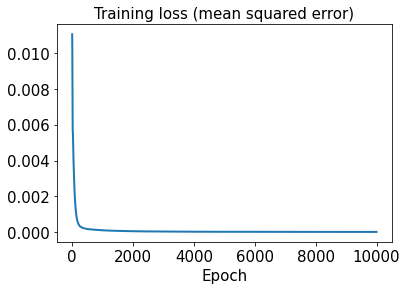

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

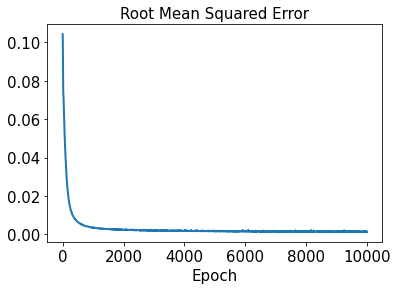

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

10/10 [==============================] - 0s 2ms/step - loss: 2.1028e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0003499965


In [54]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.012342269


In [55]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0002589922, 0.000422543, 0.00018285238, 0.00024744417, 0.0003931972, 0.00023193458, 0.00028468305, 7.547447e-05, 0.00014014618, 0.00033795644, 0.00046078354, 0.00024927588, 0.00036993474, 0.0003615369, 0.00014713743, 0.0023189725, 0.00016309595, 0.00011363978, 0.00015875002, 0.00034166436, 0.00067205296, 0.00030006949, 0.0015188038, 0.00037830885, 0.00013543501, 0.00027179692, 0.00015059287, 0.00018405041, 0.0006221833, 0.00041063663, 0.00066817406, 0.00037963645, 0.0003084913, 0.00019989684, 0.00038659005, 0.00034970406, 0.00015922672, 0.00033343487, 0.00017655875, 0.0002042012, 0.00014208176, 0.00025637643, 0.00016303595, 0.0004741247, 0.00041920677, 0.00067792245, 0.00023510127, 0.0002346127, 0.00028579883, 0.00021730059, 0.00036067798, 0.0010785052, 0.00026743455, 0.00015312656, 0.0011225349, 0.00020347275, 0.00044058778, 0.00021953782, 0.00024644713, 0.00030588932, 0.00019612424, 0.0002601151, 0.00038585244, 0.00025078157, 0.00020544851, 0.00015942373, 0.000119640885, 0.0005043

In [56]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.009655459, 0.052427404, 0.0013356052, 0.00031604376, 0.0016735074, 0.110694915, 0.024359293, 0.0005432338, 0.0009616145, 0.00073334994, 0.29600626, 0.02038285, 0.0029742299, 0.0006845215, 0.007946143, 0.04600377, 0.0009817331, 0.0008332128, 0.09450291, 0.030815136, 0.0036614533, 0.001981867, 0.0035825886, 0.0012692586, 0.0003916297, 0.0012989022, 0.00064856664, 0.006713324, 0.00032806207, 0.0035575621, 0.00089993543, 0.012725953, 0.0003567297, 0.0015478688, 0.0013844111, 0.009969008, 0.0012857437, 0.00068102154, 0.0011952743, 0.005357352, 0.0016738332, 0.00056258426, 0.0011974508, 0.020756288, 0.03835407, 0.001222474, 0.0015311277, 0.072370976, 0.05509512, 0.0005860365, 0.00042716766, 0.011889817, 0.0004804292, 0.0010014942, 0.21948135, 0.010617258, 0.0008176933, 0.023352498, 0.007146739, 0.0035121636, 0.00070761127, 0.002954546, 0.000306635, 0.0019244174, 0.0017897545, 0.001220697, 0.004582357, 0.0142245125, 0.0012368697, 0.0013780013, 0.0012697754, 0.0007579496, 0.0013074494, 0.00

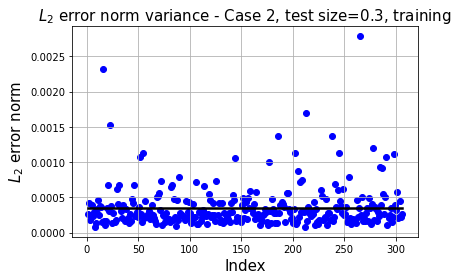

In [57]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

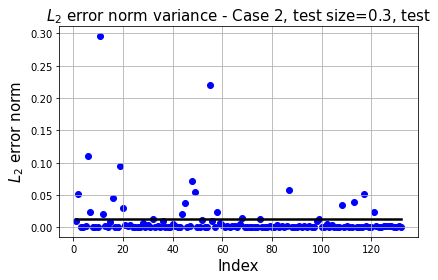

In [58]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

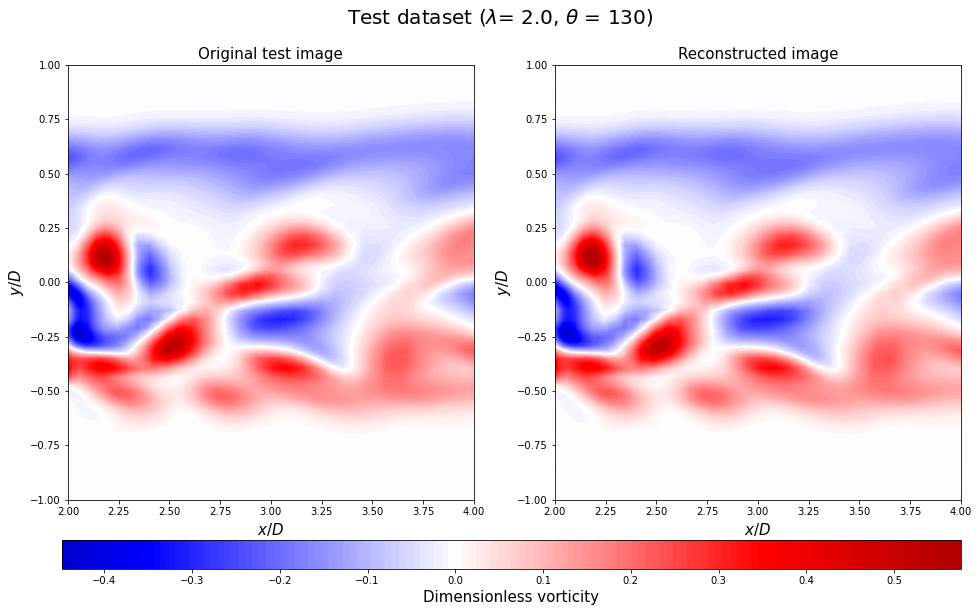

In [59]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

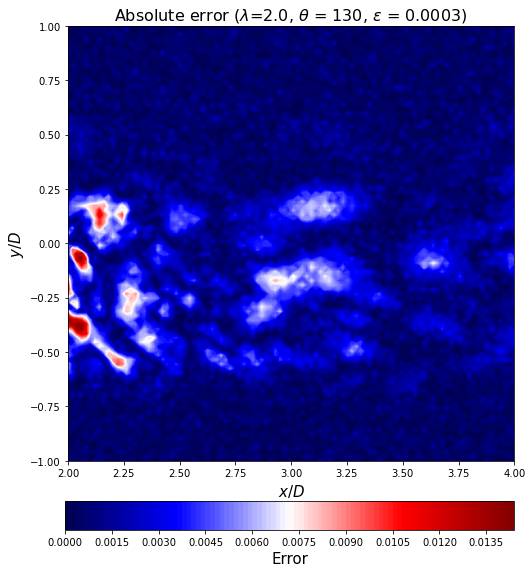

In [60]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()